# **TFG**  

***USE OF ML AND SNOMED CT ENCODED HEALTH PROBLEMS TO PREDICT HOSPITAL DISCHARGE DIAGNOSES***  

Cindy Chen

Universitat de Barcelona

2024-2025


In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

%matplotlib inline

## **Administration data**

In [2]:
# Load administration file
administration_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_administration.csv')
administration_df

,nhc,episode_ref,treatment_ref,event_date,adm_route_ref,route_descr,prn,given,no_administration_reason_ref,drug_ref,drug_descr,atc_ref,atc_descr,enum,quantity,quantity_planing,quantity_unit,load_date,care_level_ref
0,101578,546445,1121823,2024-02-05 06:55:00,150,INTRAVENOSA,NaN,NaN,0,E96F5C461C27EF6FE1000000AC100155,"PARACETAMOL, 10 MG/ML VIAL 100 ML",N02BE01,Paracetamol,0,100.0,100.0,ML,2024-10-26 10:47:29,NaN
1,101578,546445,1121824,2024-02-05 07:06:00,150,INTRAVENOSA,NaN,NaN,0,F67F5C468000801EE1000000AC100155,"DEXKETOPROFENO, 50 MG/2 ML AMP 2 ML",M01AE17,Dexketoprofeno,0,2.0,2.0,ML,2024-10-26 10:47:29,NaN
2,101578,558513,1146611,2024-02-05 12:33:55,150,INTRAVENOSA,NaN,NaN,0,9C785C468000801EE1000000AC100155,"CEFOXITINA, 1 G VIAL IV",J01DC01,Cefoxitina,0,2.0,NaN,UND,2024-10-26 10:47:29,NaN
3,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,NaN,NaN,0,E56DE74AEBF98B59E1000000AC10014C,"GLUCOSA 10%, VIAL 500 ML",B05BA91,Suero glucosado,0,500.0,500.0,ML,2024-10-26 10:47:29,21866480.0
4,101578,558513,1146612,2024-02-06 20:48:00,350,PERFUSION INTRAVENOSA,NaN,NaN,0,676E5C461C27EF6FE1000000AC100155,"GLUCOSA 10%, VIAL 500 ML",B05BA03,Carbohidratos,3,500.0,500.0,ML,2024-10-26 10:47:29,21866480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578032,9885,607221,1189193,2024-02-16 09:00:00,100,ORAL,NaN,NaN,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287.0
578033,9885,607221,1189193,2024-02-17 09:00:00,100,ORAL,NaN,NaN,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287.0
578034,9885,607221,1189193,2024-02-18 09:00:00,100,ORAL,NaN,NaN,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287.0
578035,9885,607221,1189193,2024-02-19 09:00:00,100,ORAL,NaN,NaN,0,AB6D5C461C27EF6FE1000000AC100155,"ESPIRONOLACTONA, 100 MG COMP",C03DA01,Espironolactona,0,0.5,0.5,UND,2024-10-26 10:47:29,21967287.0


In [3]:
# Remove duplicate rows
administration_df = administration_df.drop_duplicates()

In [4]:
# Rename columns
administration_df = administration_df.rename(columns={
        'event_date': 'adm_event_date',
        'route_descr': 'adm_route_descr',
        'prn': 'adm_prn',
        'given': 'adm_given',
        'drug_ref': 'adm_drug_ref',
        'drug_descr': 'adm_drug_descr',
        'atc_ref': 'adm_atc_ref',
        'atc_descr': 'adm_atc_descr',
        'enum': 'adm_enum',
        'quantity': 'adm_drug_dose',
        'quantity_planing': 'adm_drug_dose_planing',
        'quantity_unit': 'adm_drug_unit',
        'load_date': 'adm_load_date',
        })

In [5]:
# Convert 'X' values to 1 and other values to 0 in 'adm_prn' and 'given' columns
administration_df['adm_prn'] = administration_df['adm_prn'].apply(
    lambda x: 1 if x == 'X' else 0)

administration_df['adm_given'] = administration_df['adm_given'].apply(
    lambda x: 1 if x == 'X' else 0)

In [6]:
# Check for missing values
administration_df_missing_summary = pd.DataFrame({
    'Missing Count': administration_df.isnull().sum(),
    'Missing Percentage': administration_df.isnull().mean() * 100
})

display(administration_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,0,0.000000
treatment_ref,0,0.000000
adm_event_date,0,0.000000
adm_route_ref,0,0.000000
adm_route_descr,0,0.000000
adm_prn,0,0.000000
adm_given,0,0.000000
no_administration_reason_ref,0,0.000000
adm_drug_ref,0,0.000000


In [7]:
# Handling missing values

administration_df = administration_df.dropna(subset=['adm_drug_descr'])
administration_df = administration_df.dropna(subset=['adm_atc_ref'])
administration_df = administration_df.dropna(subset=['adm_atc_descr'])
administration_df = administration_df.dropna(subset=['adm_drug_dose'])
administration_df = administration_df.dropna(subset=['adm_drug_unit'])
administration_df = administration_df.dropna(subset=['care_level_ref'])

In [8]:
# Display the data types of each column in the 'administration_df'
display(administration_df.dtypes)

nhc                               int64
episode_ref                       int64
treatment_ref                     int64
adm_event_date                   object
adm_route_ref                     int64
adm_route_descr                  object
adm_prn                           int64
adm_given                         int64
no_administration_reason_ref      int64
adm_drug_ref                     object
adm_drug_descr                   object
adm_atc_ref                      object
adm_atc_descr                    object
adm_enum                          int64
adm_drug_dose                   float64
adm_drug_dose_planing           float64
adm_drug_unit                    object
adm_load_date                    object
care_level_ref                  float64
dtype: object

In [9]:
# Convert 'adm_event_date' and 'adm_load_date' columns to datetime format
administration_df['adm_event_date'] = pd.to_datetime(administration_df['adm_event_date'])
administration_df['adm_load_date'] = pd.to_datetime(administration_df['adm_load_date'])

# Convert 'care_level_ref' column to int64 format
administration_df['care_level_ref'] = administration_df['care_level_ref'].astype('int64')

In [10]:
# Statistical summary
administration_summary = administration_df.describe(include='all')
administration_summary

,nhc,episode_ref,treatment_ref,adm_event_date,adm_route_ref,adm_route_descr,adm_prn,adm_given,no_administration_reason_ref,adm_drug_ref,adm_drug_descr,adm_atc_ref,adm_atc_descr,adm_enum,adm_drug_dose,adm_drug_dose_planing,adm_drug_unit,adm_load_date,care_level_ref
count,4.515250e+05,4.515250e+05,4.515250e+05,451525,451525.000000,451525,451525.000000,451525.000000,451525.000000,451525,451525,451525,451525,451525.000000,451525.000000,314836.000000,451525,451525,4.515250e+05
unique,NaN,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,1293,1275,591,574,NaN,NaN,NaN,8,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,ORAL,NaN,NaN,NaN,E96F5C461C27EF6FE1000000AC100155,"PARACETAMOL, 10 MG/ML VIAL 100 ML",N02BE01,Paracetamol,NaN,NaN,NaN,UND,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,208225,NaN,NaN,NaN,26822,26822,40034,40034,NaN,NaN,NaN,238038,NaN,NaN
mean,2.144691e+07,5.422693e+05,9.876097e+05,2024-02-17 05:11:43.523133952,172.574890,NaN,0.135093,0.068162,0.441958,NaN,NaN,NaN,NaN,0.271407,64.590270,58.398012,NaN,2024-10-26 18:55:29.905696768,2.151337e+07
min,1.504000e+03,2.060000e+02,7.600000e+01,2012-07-03 08:30:00,100.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.003333,0.000144,NaN,2024-10-26 10:47:29,2.210000e+02
25%,4.497930e+06,3.148370e+05,8.080830e+05,2024-03-02 09:00:00,100.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,2024-10-26 10:47:29,2.205960e+07
50%,5.410290e+06,4.534950e+05,9.993730e+05,2024-03-22 08:46:34,140.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,2024-10-26 10:47:29,2.238601e+07
75%,7.000861e+07,6.116070e+05,1.190689e+06,2024-04-07 00:00:00,205.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,10.000000,10.000000,NaN,2024-10-26 10:47:29,2.256702e+07
max,8.007660e+07,3.524653e+06,2.613121e+06,2024-07-27 13:00:00,952.000000,NaN,1.000000,1.000000,12.000000,NaN,NaN,NaN,NaN,3.000000,2700.000000,50000.000000,NaN,2024-11-05 06:55:14,4.331189e+07


In [11]:
# Save dataframe
administration_df.to_csv('administration_df.csv', index=False)

## **Admission discharge data**

In [12]:
# Load admission discharge file
admission_discharge_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_adm_disch.csv')
admission_discharge_df

,nhc,episode_ref,mot_ref,mot_ref_descr,type_mot,load_date
0,100032,210865,320012,Orden Facultativo,START,2024-10-20 13:41:17
1,100032,210865,320001,Destino Domicilio,END,2024-10-20 13:41:54
2,100032,706875,320012,Orden Facultativo,START,2024-10-20 13:41:17
3,100032,706875,320001,Destino Domicilio,END,2024-10-20 13:41:54
4,100032,1501103,320012,Orden Facultativo,START,2024-10-20 13:41:17
...,...,...,...,...,...,...
22525,9885,147485,320001,Destino Domicilio,END,2024-10-20 13:41:54
22526,9885,607221,320001,Destino Domicilio,END,2024-10-20 13:41:54
22527,9885,607221,320012,Orden Facultativo,START,2024-10-20 13:41:17
22528,9885,1230503,320012,Orden Facultativo,START,2024-10-20 13:41:17


In [13]:
# Remove duplicate rows
admission_discharge_df = admission_discharge_df.drop_duplicates()

In [14]:
# Rename columns
admission_discharge_df = admission_discharge_df.rename(columns={
        'load_date': 'admission_discharge_load_date',
        })

In [15]:
# Check for missing values
admission_discharge_df_missing_summary = pd.DataFrame({
    'Missing Count': admission_discharge_df.isnull().sum(),
    'Missing Percentage': admission_discharge_df.isnull().mean() * 100
})

display(admission_discharge_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
mot_ref,0,0.0
mot_ref_descr,0,0.0
type_mot,0,0.0
admission_discharge_load_date,0,0.0


In [16]:
# Display the data types of each column in the 'admission_discharge_df'
display(admission_discharge_df.dtypes)

nhc                               int64
episode_ref                       int64
mot_ref                           int64
mot_ref_descr                    object
type_mot                         object
admission_discharge_load_date    object
dtype: object

In [17]:
# Convert 'admission_discharge_load_date' column to datetime format
admission_discharge_df['admission_discharge_load_date'] = pd.to_datetime(
    admission_discharge_df['admission_discharge_load_date'])

In [18]:
# Statistical summary
admission_discharge_summary = admission_discharge_df.describe(include='all')
admission_discharge_summary

,nhc,episode_ref,mot_ref,mot_ref_descr,type_mot,admission_discharge_load_date
count,2.253000e+04,2.253000e+04,22530.000000,22530,22530,22530
unique,NaN,NaN,NaN,16,2,NaN
top,NaN,NaN,NaN,Orden Facultativo,END,NaN
freq,NaN,NaN,NaN,11028,11345,NaN
mean,2.266464e+07,1.741308e+06,320006.656547,NaN,NaN,2024-10-24 15:20:15.799467008
min,3.700000e+02,2.860000e+02,320001.000000,NaN,NaN,2024-10-20 13:41:17
25%,4.202659e+06,6.100110e+05,320001.000000,NaN,NaN,2024-10-20 13:41:17
50%,5.268793e+06,1.842777e+06,320008.000000,NaN,NaN,2024-10-20 13:41:54
75%,7.007447e+07,2.667569e+06,320012.000000,NaN,NaN,2024-10-25 20:07:53
max,8.007661e+07,3.524653e+06,320018.000000,NaN,NaN,2024-11-04 22:49:45


In [19]:
# Save dataframe
admission_discharge_df.to_csv('admission_discharge_df.csv', index=False)

## **Care level data**

In [20]:
# Load care level file
care_level_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_care_level.csv')
care_level_df

,nhc,episode_ref,care_level_ref,start_date,end_date,load_date,care_level_type_ref
0,100032,210865,22649948,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:57:35,PEND. CLAS
1,100032,706875,22051594,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:57:35,PEND. CLAS
2,100032,1501103,20238333,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:57:35,PEND. CLAS
3,100424,3358256,17991800,2022-10-26 14:29:06,2022-10-26 21:18:07,2024-11-04 22:37:20,EM
4,101254,3390092,17624298,2022-09-02 14:38:37,2022-09-02 21:54:31,2024-11-04 22:37:20,PEND. CLAS
...,...,...,...,...,...,...,...
49193,9885,594249,21945545,2024-02-08 16:38:10,2024-02-09 20:56:10,2024-10-20 12:57:35,EM
49194,9885,607221,21967287,2024-02-13 12:15:16,2024-02-28 15:45:00,2024-10-20 12:57:35,WARD
49195,9885,607221,21968690,2024-02-11 23:34:28,2024-02-13 12:15:16,2024-10-20 12:57:35,ICU
49196,9885,607221,21968926,2024-02-09 21:04:15,2024-02-11 23:34:28,2024-10-20 12:57:35,WARD


In [21]:
# Remove duplicate rows
care_level_df = care_level_df.drop_duplicates()

In [22]:
# Rename columns
care_level_df = care_level_df.rename(columns={
        'start_date': 'care_level_start_date',
        'end_date': 'care_level_end_date',
        'load_date': 'care_level_load_date',
        })

In [23]:
# Check for missing values
care_level_df_missing_summary = pd.DataFrame({
    'Missing Count': care_level_df.isnull().sum(),
    'Missing Percentage': care_level_df.isnull().mean() * 100
})

display(care_level_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
care_level_ref,0,0.0
care_level_start_date,0,0.0
care_level_end_date,0,0.0
care_level_load_date,0,0.0
care_level_type_ref,0,0.0


In [24]:
# Display the data types of each column in the 'care_level_df'
display(care_level_df.dtypes)

nhc                       int64
episode_ref               int64
care_level_ref            int64
care_level_start_date    object
care_level_end_date      object
care_level_load_date     object
care_level_type_ref      object
dtype: object

In [25]:
# Convert care level date columns to datetime format
care_level_df['care_level_start_date'] = pd.to_datetime(care_level_df['care_level_start_date'])
care_level_df['care_level_end_date'] = pd.to_datetime(care_level_df['care_level_end_date'])
care_level_df['care_level_load_date'] = pd.to_datetime(care_level_df['care_level_load_date'])

In [26]:
# Statistical summary
care_level_summary = care_level_df.describe(include='all')
care_level_summary

,nhc,episode_ref,care_level_ref,care_level_start_date,care_level_end_date,care_level_load_date,care_level_type_ref
count,4.919800e+04,4.919800e+04,4.919800e+04,49198,49198,49198,49198
unique,NaN,NaN,NaN,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,EM
freq,NaN,NaN,NaN,NaN,NaN,NaN,24234
mean,2.175516e+07,1.763370e+06,1.997262e+07,2023-07-18 07:59:24.137891840,2023-07-20 06:28:16.250986240,2024-10-24 13:52:26.189275648,NaN
min,3.700000e+02,1.130000e+02,1.200000e+02,2006-03-14 10:08:11,2006-03-14 11:29:17,2024-10-20 12:57:35,NaN
25%,4.306568e+06,6.780390e+05,1.887014e+07,2023-03-03 13:09:30,2023-03-06 16:15:00,2024-10-20 12:57:35,NaN
50%,5.274097e+06,1.855420e+06,1.994542e+07,2023-08-12 02:06:33,2023-08-14 02:00:29,2024-10-20 12:57:35,NaN
75%,7.004136e+07,2.660594e+06,2.139419e+07,2023-12-27 21:27:02.249999872,2023-12-29 13:55:00,2024-10-25 19:52:41,NaN
max,8.007661e+07,3.524978e+06,4.861922e+07,2024-07-07 01:19:13,2024-07-26 16:00:00,2024-11-04 22:37:20,NaN


In [27]:
# Save dataframe
care_level_df.to_csv('care_level_df.csv', index=False)

## **Clinical records data**

In [28]:
# Load clinical records file
clinical_records_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_rc.csv')
clinical_records_df

,nhc,episode_ref,result_date,meas_type_ref,load_date,ou_loc_ref,ou_med_ref,rc_sap_ref,result_num,result_txt,units,descr,care_level_ref
0,101578,558513.0,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,PRESN_DIA,74.0,NaN,mm Hg,Presión arterial no invasiva diastólica,21866480.0
1,101578,558513.0,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FR_IP,12.0,NaN,resp/min,Frecuencia respiratoria por impedancia,21866480.0
2,101578,558513.0,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FC_OSC,103.0,NaN,lpm,Frecuencia cardíaca por oscilometría,21866480.0
3,101578,558513.0,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,FREC_RESP,12.0,NaN,resp/min,Frecuencia respiratoria por inspección,21866480.0
4,101578,558513.0,2024-02-06 13:31:00,1,2024-10-20 17:58:05,NaN,NaN,TEMP_CT,36.5,NaN,°C,Temperatura cutánea,21866480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045607,9885,594249.0,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,CUERPO_CETONICO,NaN,CUERPO_CETONICO_,Descripción,Cuerpos cetónicos en tira reactiva,21945545.0
3045608,9885,594249.0,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,LEUCOCITURIA,NaN,LEUCOCITURIA_4,Descripción,Leucocituria en tira reactiva,21945545.0
3045609,9885,594249.0,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,NITRITO_ORINA,NaN,NITRITO_ORINAQ_1,Descripción,Nitritos en tira reactiva,21945545.0
3045610,9885,594249.0,2024-02-08 22:00:00,0,2024-10-21 16:19:04,PUR2,URM,UROBILINO_ORINA,NaN,UROBILINO_ORINA_,Descripción,Urobilinógeno en tira reactiva,21945545.0


In [29]:
# Remove duplicate rows
clinical_records_df = clinical_records_df.drop_duplicates()

In [30]:
# Rename columns
clinical_records_df = clinical_records_df.rename(columns={
        'result_date': 'clinical_records_result_date',
        'meas_type_ref': 'cr_meas_type_ref',
        'load_date': 'clinical_records_load_date',
        'ou_loc_ref': 'cr_ou_loc_ref',
        'ou_med_ref': 'cr_ou_ned_ref',
        'result_num': 'clinical_records_result_num',
        'result_txt': 'clinical_records_result_txt',
        'units': 'clinical_records_units',
        'descr': 'clinical_records_descr',
        })

In [31]:
# Check for missing values
clinical_records_df_missing_summary = pd.DataFrame({
    'Missing Count': clinical_records_df.isnull().sum(),
    'Missing Percentage': clinical_records_df.isnull().mean() * 100
})

display(clinical_records_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,1729,0.056780
clinical_records_result_date,0,0.000000
cr_meas_type_ref,0,0.000000
clinical_records_load_date,0,0.000000
cr_ou_loc_ref,1528345,50.190850
cr_ou_ned_ref,1528345,50.190850
rc_sap_ref,8020,0.263377
clinical_records_result_num,782849,25.708761
clinical_records_result_txt,2262218,74.291239


In [32]:
# Handling missing values
clinical_records_df = clinical_records_df.dropna(subset=['episode_ref'])
clinical_records_df = clinical_records_df.dropna(subset=['rc_sap_ref'])
# clinical_records_df['clinical_records_result'] = clinical_records_df['clinical_records_result_num'].fillna(clinical_records_df['clinical_records_result_txt'])
clinical_records_df = clinical_records_df.dropna(subset=['care_level_ref'])

In [33]:
# Display the data types of each column in the 'clinical_records_df'
display(clinical_records_df.dtypes)

nhc                               int64
episode_ref                     float64
clinical_records_result_date     object
cr_meas_type_ref                  int64
clinical_records_load_date       object
cr_ou_loc_ref                    object
cr_ou_ned_ref                    object
rc_sap_ref                       object
clinical_records_result_num     float64
clinical_records_result_txt      object
clinical_records_units           object
clinical_records_descr           object
care_level_ref                  float64
dtype: object

In [34]:
# Convert date columns to datetime format
clinical_records_df['clinical_records_result_date'] = pd.to_datetime(clinical_records_df['clinical_records_result_date'])
clinical_records_df['clinical_records_load_date'] = pd.to_datetime(clinical_records_df['clinical_records_load_date'])

# Convert 'episode_ref' and 'care_level_ref' columns to int64 format
clinical_records_df['episode_ref'] = clinical_records_df['episode_ref'].astype('int64')
clinical_records_df['care_level_ref'] = clinical_records_df['care_level_ref'].astype('int64')

In [35]:
# Statistical summary
clinical_records_summary = clinical_records_df.describe(include='all')
clinical_records_summary

,nhc,episode_ref,clinical_records_result_date,cr_meas_type_ref,clinical_records_load_date,cr_ou_loc_ref,cr_ou_ned_ref,rc_sap_ref,clinical_records_result_num,clinical_records_result_txt,clinical_records_units,clinical_records_descr,care_level_ref
count,3.035322e+06,3.035322e+06,3035322,3.035322e+06,3035322,1507601,1507601,3035322,2.252968e+06,782354,3035322,3035322,3.035322e+06
unique,NaN,NaN,NaN,NaN,NaN,144,73,513,NaN,533,47,503,NaN
top,NaN,NaN,NaN,NaN,NaN,E073,NMO,PULSIOX,NaN,ESTADO_CONCIENC_,mm Hg,Saturación de oxígeno por pulsioximetría,NaN
freq,NaN,NaN,NaN,NaN,NaN,129364,193552,237113,NaN,138258,689370,237113,NaN
mean,2.089096e+07,1.224530e+06,2023-10-22 21:50:34.644533760,8.856698e-01,2024-10-25 16:08:31.981819392,NaN,NaN,NaN,7.149557e+01,NaN,NaN,NaN,2.046466e+07
min,8.060000e+02,1.130000e+02,2022-12-01 01:21:00,0.000000e+00,2024-10-20 17:58:05,NaN,NaN,NaN,-2.350000e+02,NaN,NaN,NaN,1.200000e+02
25%,4.321857e+06,1.491560e+05,2023-07-26 19:00:00,0.000000e+00,2024-10-20 17:58:05,NaN,NaN,NaN,2.400000e+01,NaN,NaN,NaN,1.974971e+07
50%,5.422664e+06,1.311161e+06,2023-11-28 15:00:00,1.000000e+00,2024-10-23 22:02:41,NaN,NaN,NaN,6.800000e+01,NaN,NaN,NaN,2.078456e+07
75%,7.000861e+07,2.028966e+06,2024-02-13 15:00:00,2.000000e+00,2024-10-28 13:11:47,NaN,NaN,NaN,9.600000e+01,NaN,NaN,NaN,2.168209e+07
max,8.007661e+07,3.091130e+06,2024-07-26 08:39:00,2.000000e+00,2024-11-06 22:20:16,NaN,NaN,NaN,4.171000e+03,NaN,NaN,NaN,2.268320e+07


In [36]:
# Save dataframe
clinical_records_df.to_csv('clinical_records_df.csv', index=False)

## **Demographic data**

In [37]:
# Load demographic file
demographic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_demo.csv')
demographic_df

,nhc,birth_date,sex_atr,natio_ref,nation_descr,load_date
0,100032,1955-06-18,2,ES,España,2024-10-20 11:50:51
1,100424,1962-12-05,2,ES,España,2024-10-25 19:03:32
2,101254,1956-06-11,2,ES,España,2024-10-20 11:50:51
3,101347,1988-07-03,2,ES,España,2024-10-20 11:50:51
4,10141,1956-10-20,2,ES,España,2024-10-20 11:50:51
...,...,...,...,...,...,...
20284,98787,1946-07-04,2,ES,España,2024-10-20 11:50:51
20285,9885,1955-12-28,2,ES,España,2024-10-20 11:50:51
20286,99191,1962-12-10,2,ES,España,2024-11-04 22:23:45
20287,99419,1968-06-24,1,ES,España,2024-10-20 11:50:51


In [38]:
# Remove duplicate rows
demographic_df = demographic_df.drop_duplicates()

In [39]:
# Rename columns
demographic_df = demographic_df.rename(columns={
    'load_date': 'demographic_load_date',
        })

In [40]:
# Check for missing values
demographic_df_missing_summary = pd.DataFrame({
    'Missing Count': demographic_df.isnull().sum(),
    'Missing Percentage': demographic_df.isnull().mean() * 100
})

display(demographic_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
birth_date,0,0.0
sex_atr,0,0.0
natio_ref,0,0.0
nation_descr,0,0.0
demographic_load_date,0,0.0


In [41]:
# Display the data types of each column in the 'demographic_df'
display(demographic_df.dtypes)

nhc                       int64
birth_date               object
sex_atr                   int64
natio_ref                object
nation_descr             object
demographic_load_date    object
dtype: object

In [42]:
# Convert 'birth_date' and 'load_date' columns to datetime format
demographic_df['birth_date'] = pd.to_datetime(demographic_df['birth_date'])
demographic_df['demographic_load_date'] = pd.to_datetime(demographic_df['demographic_load_date'])

In [43]:
# Statistical summary
demographic_summary = demographic_df.describe(include='all')
demographic_summary

,nhc,birth_date,sex_atr,natio_ref,nation_descr,demographic_load_date
count,2.028900e+04,20289,20289.000000,20289,20289,20289
unique,NaN,NaN,NaN,110,110,NaN
top,NaN,NaN,NaN,ES,España,NaN
freq,NaN,NaN,NaN,17297,17297,NaN
mean,1.929176e+07,1967-05-30 18:31:40.340085744,1.579920,NaN,NaN,2024-10-22 00:02:51.266154496
min,3.700000e+02,1900-01-01 00:00:00,1.000000,NaN,NaN,2024-10-20 11:50:51
25%,4.405127e+06,1950-01-02 00:00:00,1.000000,NaN,NaN,2024-10-20 11:50:51
50%,5.341463e+06,1965-08-06 00:00:00,2.000000,NaN,NaN,2024-10-20 11:50:51
75%,5.678435e+06,1985-03-21 00:00:00,2.000000,NaN,NaN,2024-10-20 11:50:51
max,8.007671e+07,2024-04-02 00:00:00,3.000000,NaN,NaN,2024-11-04 22:23:45


In [44]:
# Save dataframe
demographic_df.to_csv('demographic_df.csv', index=False)

## **Diagnostic data**

In [45]:
# Load diagnostic file
diagnostic_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_diag.csv')
diagnostic_df

,nhc,episode_ref,reg_date,diag_ref,catalog,code,descr,class_ref,poa_ref,load_date
0,100032,210865,2024-03-27 13:45:11,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,-,2024-10-20 14:35:10
1,100032,210865,2024-04-03 10:00:00,17136,12,C44.92,"Carcinoma de células escamosas de piel, locali...",H,-,2024-10-20 14:35:10
2,100032,210865,2024-04-03 09:26:00,23995,12,L82.1,Otros tipos de queratosis seborreica,S,Y,2024-10-20 14:35:10
3,100032,210865,2024-04-03 09:26:00,12789,12,L57.0,Queratosis actinica,S,Y,2024-10-20 14:35:10
4,100032,210865,2024-04-03 09:26:00,1604,12,C44.321,Carcinoma de células escamosas de piel de nariz,P,Y,2024-10-20 14:35:10
...,...,...,...,...,...,...,...,...,...,...
318512,99419,2010780,2024-06-17 13:10:16,13545,12,E24.9,"Sindrome de cushing, no especificado",A,-,2024-10-20 14:35:10
318513,99419,2010780,2024-05-30 18:34:12,13545,12,E24.9,"Sindrome de cushing, no especificado",A,-,2024-10-20 14:35:10
318514,99419,2010780,2024-07-05 13:18:27,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,-,2024-10-20 14:35:10
318515,99419,2010780,2024-07-08 13:18:18,14619,12,F60.9,"Trastorno de la personalidad, no especificado",A,-,2024-10-20 14:35:10


In [46]:
# Remove duplicate rows
diagnostic_df = diagnostic_df.drop_duplicates()

In [47]:
# Rename columns
diagnostic_df = diagnostic_df.rename(columns={
    'catalog': 'diag_catalog',
    'code': 'icd10_code',
    'descr': 'icd10_descr',
    'class_ref': 'diag_class_ref',
    'poa_ref': 'diag_poa_ref',
    'load_date': 'diagnostic_load_date',
        })

In [48]:
# Convert 'Y' to 1 and fill missing with 0 
diagnostic_df['diag_poa_ref'] = diagnostic_df['diag_poa_ref'].apply(
    lambda x: 1 if x == 'Y' else 0)

In [49]:
# Check for missing values
diagnostic_df_missing_summary = pd.DataFrame({
    'Missing Count': diagnostic_df.isnull().sum(),
    'Missing Percentage': diagnostic_df.isnull().mean() * 100
})

display(diagnostic_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
reg_date,0,0.0
diag_ref,0,0.0
diag_catalog,0,0.0
icd10_code,0,0.0
icd10_descr,0,0.0
diag_class_ref,0,0.0
diag_poa_ref,0,0.0
diagnostic_load_date,0,0.0


In [50]:
# Display the data types of each column in the 'diagnostic_df'
display(diagnostic_df.dtypes)

nhc                      int64
episode_ref              int64
reg_date                object
diag_ref                 int64
diag_catalog             int64
icd10_code              object
icd10_descr             object
diag_class_ref          object
diag_poa_ref             int64
diagnostic_load_date    object
dtype: object

In [51]:
# Convert 'reg_date' and 'diagnostic_load_date' columns to datetime format
diagnostic_df['reg_date'] = pd.to_datetime(diagnostic_df['reg_date'])
diagnostic_df['diagnostic_load_date'] = pd.to_datetime(diagnostic_df['diagnostic_load_date'])

In [52]:
# Statistical summary
diagnostic_summary = diagnostic_df.describe(include='all')
diagnostic_summary

,nhc,episode_ref,reg_date,diag_ref,diag_catalog,icd10_code,icd10_descr,diag_class_ref,diag_poa_ref,diagnostic_load_date
count,3.184860e+05,3.184860e+05,318486,318486.000000,318486.000000,318486,318486,318486,318486.000000,318486
unique,NaN,NaN,NaN,NaN,NaN,8529,8728,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,R69,Enfermedad NEOM,A,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,8068,8068,147745,NaN,NaN
mean,2.180747e+07,1.813327e+06,2023-09-08 11:15:14.083554304,12675.814720,12.028086,NaN,NaN,NaN,0.212308,2024-10-24 21:20:17.099047168
min,3.700000e+02,1.500000e+01,2022-06-08 09:24:23,4.000000,11.000000,NaN,NaN,NaN,0.000000,2024-10-20 14:35:10
25%,4.277413e+06,7.386030e+05,2023-04-19 20:46:53.750000128,5307.000000,12.000000,NaN,NaN,NaN,0.000000,2024-10-20 14:35:10
50%,5.298040e+06,1.932698e+06,2023-10-04 17:57:00,11671.000000,12.000000,NaN,NaN,NaN,0.000000,2024-10-20 14:35:10
75%,7.004432e+07,2.715726e+06,2024-02-09 14:13:41.750000128,18621.000000,12.000000,NaN,NaN,NaN,0.000000,2024-10-25 20:35:09
max,8.007671e+07,3.517359e+06,2024-08-01 13:50:22,35197.000000,13.000000,NaN,NaN,NaN,1.000000,2024-11-05 13:12:25


In [53]:
# Save dataframe
diagnostic_df.to_csv('diagnostic_df.csv', index=False)

## **Diagnosis-Related Group (DRG) data**

In [54]:
# Load Diagnosis Related Group (DRG) file
drg_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_drg.csv')
drg_df

,nhc,episode_ref,weight,drg_ref,soi_ref,soi_descr,rom_ref,rom_descr,mdc_ref,load_date
0,100032,210865,0.7030,364,1,Minor,1,Minor,9,2024-10-20 15:17:25
1,100032,706875,0.9075,73,1,Minor,1,Minor,2,2024-10-20 15:17:25
2,100032,1501103,0.4340,385,1,Minor,1,Minor,9,2024-10-20 15:17:25
3,101578,558513,0.7316,240,1,Minor,1,Minor,6,2024-10-20 15:17:25
4,101886,722211,1.0182,310,1,Minor,1,Minor,8,2024-10-20 15:17:25
...,...,...,...,...,...,...,...,...,...,...
10337,9885,551,1.0151,143,3,Major,2,Moderate,4,2024-10-20 15:17:25
10338,9885,82784,0.6468,283,2,Moderate,1,Minor,7,2024-10-20 15:17:25
10339,9885,147485,0.8626,281,2,Moderate,2,Moderate,7,2024-10-20 15:17:25
10340,9885,607221,0.8946,283,3,Major,4,Extreme,7,2024-10-20 15:17:25


In [55]:
# Remove duplicate rows
drg_df = drg_df.drop_duplicates()

In [56]:
# Rename columns
drg_df = drg_df.rename(columns={
    'weight': 'drg_weight',
    'soi_ref': 'drg_soi_ref',
    'soi_descr': 'drg_soi_descr',
    'rom_ref': 'drg_rom_ref',
    'rom_descr': 'drg_rom_descr',
    'mdc_ref': 'drg_mdc_ref',
    'load_date': 'drg_load_date',
        })

In [57]:
# Check for missing values
drg_df_missing_summary = pd.DataFrame({
    'Missing Count': drg_df.isnull().sum(),
    'Missing Percentage': drg_df.isnull().mean() * 100
})

display(drg_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
drg_weight,0,0.0
drg_ref,0,0.0
drg_soi_ref,0,0.0
drg_soi_descr,0,0.0
drg_rom_ref,0,0.0
drg_rom_descr,0,0.0
drg_mdc_ref,0,0.0
drg_load_date,0,0.0


In [58]:
# Display the data types of each column in the 'drg_df'
display(drg_df.dtypes)

nhc                int64
episode_ref        int64
drg_weight       float64
drg_ref            int64
drg_soi_ref        int64
drg_soi_descr     object
drg_rom_ref        int64
drg_rom_descr     object
drg_mdc_ref        int64
drg_load_date     object
dtype: object

In [59]:
# Convert 'drg_load_date' column to datetime format
drg_df['drg_load_date'] = pd.to_datetime(drg_df['drg_load_date'])

In [60]:
# Statistical summary
drg_summary = drg_df.describe(include='all')
drg_summary

,nhc,episode_ref,drg_weight,drg_ref,drg_soi_ref,drg_soi_descr,drg_rom_ref,drg_rom_descr,drg_mdc_ref,drg_load_date
count,1.033500e+04,1.033500e+04,10335.000000,10335.000000,10335.000000,10335,10335.000000,10335,10335.000000,10335
unique,NaN,NaN,NaN,NaN,NaN,5,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Minor,NaN,Minor,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,5041,NaN,6379,NaN,NaN
mean,2.248423e+07,1.740252e+06,1.304767,327.026415,1.758587,NaN,1.566522,NaN,8.263280,2024-10-24 16:53:43.615577856
min,3.700000e+02,2.860000e+02,0.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000,2024-10-20 15:17:25
25%,4.211971e+06,6.116910e+05,0.646800,140.000000,1.000000,NaN,1.000000,NaN,4.000000,2024-10-20 15:17:25
50%,5.276892e+06,1.846998e+06,0.902500,281.000000,2.000000,NaN,1.000000,NaN,7.000000,2024-10-20 15:17:25
75%,7.006581e+07,2.660800e+06,1.261400,463.000000,2.000000,NaN,2.000000,NaN,11.000000,2024-10-25 21:50:09
max,8.007661e+07,3.517188e+06,25.933900,955.000000,4.000000,NaN,4.000000,NaN,25.000000,2024-11-05 13:56:18


In [61]:
# Save dataframe
drg_df.to_csv('drg_df.csv', index=False)

## **Encounter data**

In [62]:
# Load encounter file
encounter_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_encounter.csv')
encounter_df

,nhc,episode_ref,date,load_date,ou_med_ref,ou_loc_ref,out_type_ref,agen_ref,act_type_ref
0,100032,210865,2024-04-03 10:00:00,2024-10-20 13:18:11,DER,BQUIR,IQ,NaN,NaN
1,100032,210865,2024-04-03 11:36:46,2024-10-20 13:16:21,DER,RBP11,VI,NaN,NaN
2,100032,706875,2024-02-20 11:00:00,2024-10-20 13:18:11,DER,BQUIR,IQ,NaN,NaN
3,100032,706875,2024-02-20 10:54:09,2024-10-20 13:16:21,DER,RBP11,VI,NaN,NaN
4,100032,1501103,2023-10-03 10:24:00,2024-10-20 13:18:11,DER,BQUIR,IQ,NaN,NaN
...,...,...,...,...,...,...,...,...,...
217866,9885,607221,2024-02-26 15:05:00,2024-10-20 13:18:11,RADIO,RAD,PR,NaN,NaN
217867,99191,3192157,2022-11-22 03:31:51,2024-11-04 22:42:19,RADIO,MMGSC,PP,NaN,NaN
217868,99191,3192157,2022-11-28 19:36:00,2024-11-04 22:39:20,RADIO,MMGSC,PR,NaN,NaN
217869,99419,2010780,2023-07-19 14:35:57,2024-10-20 13:22:45,PSI,PSICE,PP,NaN,NaN


In [63]:
# Remove duplicate rows
encounter_df = encounter_df.drop_duplicates()

In [64]:
# Rename columns
encounter_df = encounter_df.rename(columns={
    'date': 'encounter_date',
    'load_date': 'encounter_load_date',
    'ou_med_ref': 'encounter_ou_med_ref',
    'ou_loc_ref': 'encounter_ou_loc_ref',
    'out_type_ref': 'encounter_out_type_ref',
    'agen_ref': 'encounter_agen_ref',
    'act_type_ref': 'encounter_act_type_ref',
        })

In [65]:
# Check for missing values
encounter_df_missing_summary = pd.DataFrame({
    'Missing Count': encounter_df.isnull().sum(),
    'Missing Percentage': encounter_df.isnull().mean() * 100
})

display(encounter_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
encounter_date,0,0.0
encounter_load_date,0,0.0
encounter_ou_med_ref,0,0.0
encounter_ou_loc_ref,0,0.0
encounter_out_type_ref,0,0.0
encounter_agen_ref,216346,100.0
encounter_act_type_ref,216346,100.0


In [66]:
# Handling missing values
encounter_df = encounter_df.drop('encounter_agen_ref', axis=1)
encounter_df = encounter_df.drop('encounter_act_type_ref', axis=1)

In [67]:
# Display the data types of each column in the 'encounter_df'
display(encounter_df.dtypes)

nhc                        int64
episode_ref                int64
encounter_date            object
encounter_load_date       object
encounter_ou_med_ref      object
encounter_ou_loc_ref      object
encounter_out_type_ref    object
dtype: object

In [68]:
# Convert 'encounter_date' and 'encounterload_date' columns to datetime format
encounter_df['encounter_date'] = pd.to_datetime(encounter_df['encounter_date'])
encounter_df['encounter_load_date'] = pd.to_datetime(encounter_df['encounter_load_date'])

In [69]:
# Statistical summary
encounter_summary = encounter_df.describe(include='all')
encounter_summary

,nhc,episode_ref,encounter_date,encounter_load_date,encounter_ou_med_ref,encounter_ou_loc_ref,encounter_out_type_ref
count,2.163460e+05,2.163460e+05,216346,216346,216346,216346,216346
unique,NaN,NaN,NaN,NaN,168,454,13
top,NaN,NaN,NaN,NaN,RADIO,RAD,PR
freq,NaN,NaN,NaN,NaN,48633,19582,142015
mean,2.135331e+07,1.830706e+06,2023-09-12 04:11:05.343514880,2024-10-24 20:20:02.313512192,NaN,NaN,NaN
min,3.700000e+02,1.500000e+01,2006-03-14 10:28:00,2024-10-20 13:16:21,NaN,NaN,NaN
25%,4.264658e+06,7.691300e+05,2023-05-04 21:10:15,2024-10-20 13:18:11,NaN,NaN,NaN
50%,5.293406e+06,1.977432e+06,2023-10-19 19:23:04.500000,2024-10-20 13:22:45,NaN,NaN,NaN
75%,7.002691e+07,2.793601e+06,2024-02-20 08:54:28,2024-10-25 19:59:26,NaN,NaN,NaN
max,8.007671e+07,3.525010e+06,2024-09-16 11:15:00,2024-11-04 22:42:19,NaN,NaN,NaN


In [70]:
# Save dataframe
encounter_df.to_csv('encounter_df.csv', index=False)

## **Episode data**

In [71]:
# Load episode file
episode_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_episode.csv')
episode_df

,nhc,episode_ref,type_ref,start_date,end_date,load_date
0,100032,210865,HOSP_IQ,2024-04-03 09:26:00,2024-04-03 13:42:48,2024-10-20 12:54:04
1,100032,706875,HOSP_IQ,2024-02-20 10:33:00,2024-02-20 13:58:40,2024-10-20 12:54:04
2,100032,1501103,HOSP_IQ,2023-10-03 10:23:00,2023-10-03 14:32:43,2024-10-20 12:54:04
3,100032,1581317,AM,2023-10-18 16:04:22,2023-10-18 16:04:22,2024-10-20 12:54:04
4,100424,2794240,AM,2023-02-22 11:14:50,2024-05-24 13:00:00,2024-10-25 19:49:51
...,...,...,...,...,...,...
95417,9885,1230503,HOSP,2024-01-10 08:15:00,2024-01-11 08:15:00,2024-10-20 12:54:04
95418,9885,1238025,AM,2024-01-10 13:22:49,2024-03-30 09:20:00,2024-10-20 12:54:04
95419,99191,3192157,AM,2022-11-22 03:31:51,2022-11-28 19:36:00,2024-11-04 22:35:42
95420,99419,2010780,AM,2023-07-19 14:35:57,2024-07-22 12:30:00,2024-10-20 12:54:04


In [72]:
# Remove duplicate rows
episode_df = episode_df.drop_duplicates()

In [73]:
# Rename columns
episode_df = episode_df.rename(columns={
    'type_ref': 'episode_tyoe_ref',
    'start_date': 'episode_start_date',
    'end_date': 'episode_end_date',
    'load_date': 'episode_load_date',
        })

In [74]:
# Check for missing values
episode_df_missing_summary = pd.DataFrame({
    'Missing Count': episode_df.isnull().sum(),
    'Missing Percentage': episode_df.isnull().mean() * 100
})

display(episode_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
episode_ref,0,0.0
episode_tyoe_ref,0,0.0
episode_start_date,0,0.0
episode_end_date,0,0.0
episode_load_date,0,0.0


In [75]:
# Display the data types of each column in the 'episode_df'
display(episode_df.dtypes)

nhc                    int64
episode_ref            int64
episode_tyoe_ref      object
episode_start_date    object
episode_end_date      object
episode_load_date     object
dtype: object

In [76]:
# Convert episode date columns to datetime format
episode_df['episode_start_date'] = pd.to_datetime(episode_df['episode_start_date'])
episode_df['episode_end_date'] = pd.to_datetime(episode_df['episode_end_date'])
episode_df['episode_load_date'] = pd.to_datetime(episode_df['episode_load_date'])

In [77]:
# Statistical summary
episode_summary = episode_df.describe(include='all')
encounter_summary

,nhc,episode_ref,encounter_date,encounter_load_date,encounter_ou_med_ref,encounter_ou_loc_ref,encounter_out_type_ref
count,2.163460e+05,2.163460e+05,216346,216346,216346,216346,216346
unique,NaN,NaN,NaN,NaN,168,454,13
top,NaN,NaN,NaN,NaN,RADIO,RAD,PR
freq,NaN,NaN,NaN,NaN,48633,19582,142015
mean,2.135331e+07,1.830706e+06,2023-09-12 04:11:05.343514880,2024-10-24 20:20:02.313512192,NaN,NaN,NaN
min,3.700000e+02,1.500000e+01,2006-03-14 10:28:00,2024-10-20 13:16:21,NaN,NaN,NaN
25%,4.264658e+06,7.691300e+05,2023-05-04 21:10:15,2024-10-20 13:18:11,NaN,NaN,NaN
50%,5.293406e+06,1.977432e+06,2023-10-19 19:23:04.500000,2024-10-20 13:22:45,NaN,NaN,NaN
75%,7.002691e+07,2.793601e+06,2024-02-20 08:54:28,2024-10-25 19:59:26,NaN,NaN,NaN
max,8.007671e+07,3.525010e+06,2024-09-16 11:15:00,2024-11-04 22:42:19,NaN,NaN,NaN


In [78]:
# Save dataframe
episode_df.to_csv('episode_df.csv', index=False)

## **Exitus data**

In [79]:
# Load exitus file
exitus_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_exitus.csv')
exitus_df

,nhc,exitus_date,load_date
0,70551379,2024-06-13,2024-10-20 11:53:24
1,5298028,2024-07-05,2024-10-20 11:53:24
2,5676321,2024-04-15,2024-10-20 11:53:24
3,517477,2024-05-28,2024-10-20 11:53:24
4,4635652,2024-05-07,2024-10-20 11:53:24
...,...,...,...
345,70275895,2024-05-21,2024-11-04 22:24:14
346,70593531,2024-06-19,2024-11-04 22:24:14
347,70557227,2024-05-26,2024-11-04 22:24:14
348,4685197,2024-05-04,2024-11-04 22:24:14


In [80]:
# Remove duplicate rows
exitus_df = exitus_df.drop_duplicates()

In [81]:
# Rename columns
exitus_df = exitus_df.rename(columns={
    'load_date': 'exitus_load_date',
        })

In [82]:
# Check for missing values
exitus_df_missing_summary = pd.DataFrame({
    'Missing Count': exitus_df.isnull().sum(),
    'Missing Percentage': exitus_df.isnull().mean() * 100
})

display(exitus_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.0
exitus_date,0,0.0
exitus_load_date,0,0.0


In [83]:
# Display the data types of each column in the 'exitus_df'
display(exitus_df.dtypes)

nhc                  int64
exitus_date         object
exitus_load_date    object
dtype: object

In [84]:
# Convert 'exitus_date' and 'exitus_load_date' columns to datetime format
exitus_df['exitus_date'] = pd.to_datetime(exitus_df['exitus_date'])
exitus_df['exitus_load_date'] = pd.to_datetime(exitus_df['exitus_load_date'])

In [85]:
# Statistical summary
exitus_summary = exitus_df.describe(include='all')
exitus_summary

,nhc,exitus_date,exitus_load_date
count,3.500000e+02,350,350
mean,2.770132e+07,2024-05-25 15:58:37.714285824,2024-10-21 10:30:33.685714176
min,2.907000e+03,2024-02-06 00:00:00,2024-10-20 11:53:24
25%,4.153468e+06,2024-05-03 00:00:00,2024-10-20 11:53:24
50%,5.408264e+06,2024-05-23 00:00:00,2024-10-20 11:53:24
75%,7.021481e+07,2024-06-14 00:00:00,2024-10-20 11:53:24
max,8.007497e+07,2024-08-08 00:00:00,2024-11-04 22:24:14
std,3.232939e+07,NaN,NaN


In [86]:
# Save dataframe
exitus_df.to_csv('exitus_df.csv', index=False)

## **Health issues data**

In [87]:
# Load health issues file
health_issues_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_healthissues.csv')
health_issues_df

,nhc,snomed_ref,snomed_descr,ou_med_ref,start_date,end_date,motive,load_date
0,70603915,211333001,"""abrasiÓn",UCOT,2024-05-24,NaN,3.0,2024-10-20 15:21:14
1,70554835,191895007,"""abuso de cannabis sin adicciÓn",PSI,2024-04-16,NaN,1.0,2024-10-20 15:21:14
2,70650280,191919001,"""abuso de cocaÍna sin adicciÓn",NaN,2012-12-25,2024-05-05,6.0,2024-10-20 15:21:07
3,4416375,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-03-11,NaN,1.0,2024-10-20 15:21:14
4,70122561,424993006,"""adenocarcinoma de pulmÓn",ONC,2024-05-08,NaN,1.0,2024-10-20 15:21:14
...,...,...,...,...,...,...,...,...
11576,4128798,53277000,vulvovaginitis,GIN,2024-05-06,NaN,NaN,2024-10-20 15:21:14
11577,4116250,53277000,vulvovaginitis,GIN,2024-05-31,NaN,3.0,2024-10-20 15:21:14
11578,748188,53277000,vulvovaginitis,GIN,2024-06-07,NaN,NaN,2024-10-20 15:21:14
11579,4434722,53277000,vulvovaginitis,GIN,2024-05-03,NaN,1.0,2024-10-20 15:21:14


In [88]:
# Remove duplicate rows
health_issues_df = health_issues_df.drop_duplicates()

In [89]:
# Rename columns
health_issues_df = health_issues_df.rename(columns={
    'snomed_ref': 'snomed_code',
    'ou_med_ref': 'health_issue_ou_med_ref',
    'start_date': 'health_issue_start_date',
    'end_date': 'health_issue_end_date',
    'motive': 'health_issue_motive',
    'load_date': 'health_issue_load_date',
        })

In [90]:
# Check for missing values
health_issues_df_missing_summary = pd.DataFrame({
    'Missing Count': health_issues_df.isnull().sum(),
    'Missing Percentage': health_issues_df.isnull().mean() * 100
})

display(health_issues_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
snomed_code,0,0.000000
snomed_descr,0,0.000000
health_issue_ou_med_ref,152,1.317614
health_issue_start_date,0,0.000000
health_issue_end_date,9505,82.394244
health_issue_motive,6293,54.550971
health_issue_load_date,0,0.000000


In [91]:
# Handling missing values
health_issues_df = health_issues_df.dropna(subset=['health_issue_ou_med_ref'])
health_issues_df['health_issue_motive'] = health_issues_df['health_issue_motive'].fillna(0)

In [92]:
# Display the data types of each column in the 'health_issues_df'
display(health_issues_df.dtypes)

nhc                          int64
snomed_code                  int64
snomed_descr                object
health_issue_ou_med_ref     object
health_issue_start_date     object
health_issue_end_date       object
health_issue_motive        float64
health_issue_load_date      object
dtype: object

In [93]:
# Convert health issue date columns to datetime format
health_issues_df['health_issue_start_date'] = pd.to_datetime(
    health_issues_df['health_issue_start_date'])
health_issues_df['health_issue_end_date'] = pd.to_datetime(
    health_issues_df['health_issue_end_date'])
health_issues_df['health_issue_load_date'] = pd.to_datetime(
    health_issues_df['health_issue_load_date'])

# Convert 'motive' column to int64
health_issues_df['health_issue_motive'] = health_issues_df['health_issue_motive'].astype('int64')

In [94]:
# Statistical summary
health_issues_summary = health_issues_df.describe(include='all')
health_issues_summary

,nhc,snomed_code,snomed_descr,health_issue_ou_med_ref,health_issue_start_date,health_issue_end_date,health_issue_motive,health_issue_load_date
count,1.138400e+04,1.138400e+04,11384,11384,11384,2015,11384.000000,11384
unique,NaN,NaN,2348,86,NaN,NaN,NaN,NaN
top,NaN,NaN,cirrosis hepÁtica,URM,NaN,NaN,NaN,NaN
freq,NaN,NaN,414,2302,NaN,NaN,NaN,NaN
mean,2.136232e+07,2.733562e+08,NaN,NaN,2024-04-30 01:35:07.378777088,2024-05-25 04:14:24.714640384,1.753865,2024-10-20 15:26:54.400474112
min,3.700000e+02,1.090060e+05,NaN,NaN,1993-04-15 00:00:00,2019-04-01 00:00:00,0.000000,2024-10-20 15:21:07
25%,4.291717e+06,4.943600e+07,NaN,NaN,2024-04-24 00:00:00,2024-04-28 00:00:00,0.000000,2024-10-20 15:21:14
50%,5.297366e+06,1.268850e+08,NaN,NaN,2024-05-13 00:00:00,2024-05-22 00:00:00,0.000000,2024-10-20 15:21:14
75%,7.002312e+07,3.075100e+08,NaN,NaN,2024-06-04 00:00:00,2024-06-21 00:00:00,3.000000,2024-10-20 15:21:14
max,8.007661e+07,2.147484e+09,NaN,NaN,2024-09-21 00:00:00,2024-09-21 00:00:00,6.000000,2024-10-27 22:32:34


In [95]:
# Save dataframe
health_issues_df.to_csv('health_issues_df.csv', index=False)

## **Laboratory data**

In [96]:
# Load laboratory file
laboratory_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_lab.csv')
laboratory_df

,nhc,episode_ref,extrac_date,result_date,load_date,ou_med_ref,care_level_ref,lab_sap_ref,result_num,result_txt,units,descr,lab_group_ref
0,101347,1396666,2024-07-26 07:35:34,2024-07-26 12:07:34,2024-10-20 15:45:08,OBS,NaN,LAB2422,NaN,Consultar prueba,mg/dL,Glucosa,100092
1,101347,1396666,2024-07-26 07:35:34,2024-07-26 12:07:34,2024-10-20 15:45:08,OBS,NaN,LABGLUS120,134.0,NaN,N.D.,Glucosa 120 min,102716
2,101347,1396666,2024-07-26 07:35:34,2024-07-26 12:07:34,2024-10-20 15:45:08,OBS,NaN,LABGLUS180,102.0,NaN,N.D.,Glucosa 180 min,102717
3,101347,1396666,2024-07-26 07:35:34,2024-07-26 12:07:34,2024-10-20 15:45:08,OBS,NaN,LABGLUS60,200.0,NaN,N.D.,Glucosa 60 min,102720
4,101347,1396666,2024-07-26 07:35:34,2024-07-26 12:07:34,2024-10-20 15:45:08,OBS,NaN,LABGLUSB,86.0,NaN,N.D.,Glucosa basal,102722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786359,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287.0,LAB2832,24.0,NaN,N.D.,Sodi orina 24 hores,101966
2786360,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287.0,LAB2833,22.4,NaN,mEq/L,Potasio orina 24h,100161
2786361,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287.0,LAB2999,12.0,NaN,N.D.,Temps de diuresi,101974
2786362,9885,607221,2024-02-23 14:05:32,2024-02-23 14:05:11,2024-10-20 19:15:17,UTH,21967287.0,LABDIURV,1200.0,NaN,mL,"Diuresis, orina 24 h",101313


In [97]:
# Remove duplicate rows
laboratory_df = laboratory_df.drop_duplicates()

In [98]:
# Rename columns
laboratory_df = laboratory_df.rename(columns={
    'extrac_date': 'lab_extract_date',
    'result_date': 'lab_result_date',
    'load_date': 'lab_load_date',
    'ou_med_ref': 'lab_ou_med_ref',
    'result_num': 'lab_result_num',
    'result_txt': 'lab_result_txt',
    'units': 'lab_units',
    'descr': 'lab_descr',
        })

In [99]:
# Check for missing values
laboratory_df_missing_summary = pd.DataFrame({
    'Missing Count': laboratory_df.isnull().sum(),
    'Missing Percentage': laboratory_df.isnull().mean() * 100
})

display(laboratory_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,0,0.000000
lab_extract_date,0,0.000000
lab_result_date,0,0.000000
lab_load_date,0,0.000000
lab_ou_med_ref,0,0.000000
care_level_ref,908304,32.602546
lab_sap_ref,0,0.000000
lab_result_num,225198,8.083228
lab_result_txt,2560793,91.916772


In [100]:
# Handling missing values

laboratory_df = laboratory_df.dropna(subset=['care_level_ref'])
# laboratory_df['lab_result'] = laboratory_df['lab_result_num'].fillna(laboratory_df['lab_result_txt'])
laboratory_df = laboratory_df.dropna(subset=['lab_units'])
laboratory_df = laboratory_df.dropna(subset=['lab_descr'])

In [101]:
# Display the data types of each column in the 'laboratory_df'
display(laboratory_df.dtypes)

nhc                   int64
episode_ref           int64
lab_extract_date     object
lab_result_date      object
lab_load_date        object
lab_ou_med_ref       object
care_level_ref      float64
lab_sap_ref          object
lab_result_num      float64
lab_result_txt       object
lab_units            object
lab_descr            object
lab_group_ref         int64
dtype: object

In [102]:
# Convert laboratory date columns to datetime format
laboratory_df['lab_extract_date'] = pd.to_datetime(laboratory_df['lab_extract_date'])
laboratory_df['lab_result_date'] = pd.to_datetime(laboratory_df['lab_result_date'])
laboratory_df['lab_load_date'] = pd.to_datetime(laboratory_df['lab_load_date'])

# Convert 'care_level_ref' column to int64
laboratory_df['care_level_ref'] = laboratory_df['care_level_ref'].astype('int64')

In [103]:
# Statistical summary
laboratory_summary = laboratory_df.describe(include='all')
laboratory_summary

,nhc,episode_ref,lab_extract_date,lab_result_date,lab_load_date,lab_ou_med_ref,care_level_ref,lab_sap_ref,lab_result_num,lab_result_txt,lab_units,lab_descr,lab_group_ref
count,1.876207e+06,1.876207e+06,1876207,1876207,1876207,1876207,1.876207e+06,1876207,1.748341e+06,127866,1876207,1876207,1.876207e+06
unique,NaN,NaN,NaN,NaN,NaN,66,NaN,1626,NaN,1066,82,1474,NaN
top,NaN,NaN,NaN,NaN,NaN,HEM,NaN,LAB1300,NaN,Negatiu,%,"Sodio, sangre",NaN
freq,NaN,NaN,NaN,NaN,NaN,253689,NaN,36408,NaN,24997,398730,50367,NaN
mean,1.978357e+07,9.350725e+05,2023-12-11 21:31:14.709440,2023-12-11 23:17:42.716207104,2024-10-21 03:30:52.715976448,NaN,2.095446e+07,NaN,2.250478e+02,NaN,NaN,NaN,1.002773e+05
min,3.810000e+02,2.150000e+02,2012-03-26 06:25:34,2012-03-26 06:36:01,2024-10-20 15:45:08,NaN,2.320000e+02,NaN,-3.700000e+01,NaN,NaN,NaN,1.000010e+05
25%,4.499262e+06,2.207830e+05,2023-10-23 07:18:28,2023-10-23 07:47:02,2024-10-20 15:45:08,NaN,2.029095e+07,NaN,1.050000e+00,NaN,NaN,NaN,1.000780e+05
50%,5.422664e+06,6.844590e+05,2024-01-09 18:13:01,2024-01-09 18:29:01,2024-10-20 19:15:17,NaN,2.138714e+07,NaN,8.200000e+00,NaN,NaN,NaN,1.001220e+05
75%,5.682527e+06,1.598968e+06,2024-03-09 05:53:01,2024-03-09 06:51:03,2024-10-20 19:15:17,NaN,2.212778e+07,NaN,5.600000e+01,NaN,NaN,NaN,1.001600e+05
max,8.007661e+07,3.524630e+06,2024-07-16 07:31:53,2024-07-22 16:54:15,2024-11-05 12:49:58,NaN,4.331189e+07,NaN,2.432726e+08,NaN,NaN,NaN,1.048540e+05


In [104]:
# Save dataframe
laboratory_df.to_csv('laboratory_df.csv', index=False)

## **Movement data**

In [105]:
# Load movement file
movement_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_mov.csv')
movement_df

,nhc,episode_ref,start_date,end_date,place_ref,ou_med_ref,ou_med_descr,ou_loc_ref,ou_loc_descr,care_level_type_ref,facility_descr,load_date,care_level_ref
0,100032,210865,2024-04-03 09:26:00,2024-04-03 13:42:48,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22649948
1,100032,210865,2024-04-03 13:42:48,2024-04-03 13:42:48,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22649948
2,100032,706875,2024-02-20 10:33:00,2024-02-20 13:58:40,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22051594
3,100032,706875,2024-02-20 13:58:40,2024-02-20 13:58:40,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,22051594
4,100032,1501103,2023-10-03 10:23:00,2023-10-03 14:32:43,NaN,DER,DERMATOLOGIA\n,CMPLT,Sala CMA Platé,PEND. CLAS,Sin definir,2024-10-20 13:22:45,20238333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112487,9885,607221,2024-02-28 15:45:00,2024-02-28 15:45:00,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,G093,G093 SALA G DE CIR. HEPÃTICA Y TRASP.,WARD,VILLARROEL,2024-10-20 13:16:21,21967287
112488,9885,607221,2024-02-11 23:34:28,2024-02-13 12:15:16,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,E073,E073 SALA E CUIDADOS INTERMEDIOS,ICU,VILLARROEL,2024-10-20 13:16:21,21968690
112489,9885,607221,2024-02-09 21:04:15,2024-02-11 23:34:28,2.147484e+09,UTH,UNITAT DE TRANSPLANT. HEPÁTIC\n,G093,G093 SALA G DE CIR. HEPÃTICA Y TRASP.,WARD,VILLARROEL,2024-10-20 13:16:21,21968926
112490,9885,1230503,2024-01-10 08:15:00,2024-01-11 08:15:00,2.147484e+09,GAS,GASTROENTEROLOGIA\n,C074,C074 SALA CORTA ESTANCIA GASTROENTEROLOGÍA,SHORT,VILLARROEL,2024-10-20 13:16:21,21467580


In [106]:
# Remove duplicate rows
movement_df = movement_df.drop_duplicates()

In [107]:
# Rename columns
movement_df = movement_df.rename(columns={
    'start_date': 'mov_start_date',
    'end_date': 'mov_end_date',
    'place_ref': 'mov_place_ref',
    'ou_med_ref': 'mov_ou_med_ref',
    'ou_med_descr': 'mov_ou_med_descr',
    'ou_loc_ref': 'mov_ou_loc_ref',
    'ou_loc_descr': 'mov_ou_loc_descr',
    'facility_descr': 'mov_facility_descr',
    'load_date': 'mov_load_date',
        })

In [108]:
# Check for missing values
movement_df_missing_summary = pd.DataFrame({
    'Missing Count': movement_df.isnull().sum(),
    'Missing Percentage': movement_df.isnull().mean() * 100
})

display(movement_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,0,0.000000
mov_start_date,0,0.000000
mov_end_date,0,0.000000
mov_place_ref,50119,44.554579
mov_ou_med_ref,0,0.000000
mov_ou_med_descr,0,0.000000
mov_ou_loc_ref,0,0.000000
mov_ou_loc_descr,0,0.000000
care_level_type_ref,0,0.000000


In [109]:
# Display the data types of each column in the 'movement_df'
display(movement_df.dtypes)

nhc                      int64
episode_ref              int64
mov_start_date          object
mov_end_date            object
mov_place_ref          float64
mov_ou_med_ref          object
mov_ou_med_descr        object
mov_ou_loc_ref          object
mov_ou_loc_descr        object
care_level_type_ref     object
mov_facility_descr      object
mov_load_date           object
care_level_ref           int64
dtype: object

In [110]:
# Convert movement date columns to datetime format
movement_df['mov_end_date'] = pd.to_datetime(movement_df['mov_end_date'])
movement_df['mov_load_date'] = pd.to_datetime(movement_df['mov_load_date'])

In [111]:
# Statistical summary
movement_summary = movement_df.describe(include='all')
movement_summary

,nhc,episode_ref,mov_start_date,mov_end_date,mov_place_ref,mov_ou_med_ref,mov_ou_med_descr,mov_ou_loc_ref,mov_ou_loc_descr,care_level_type_ref,mov_facility_descr,mov_load_date,care_level_ref
count,1.124890e+05,1.124890e+05,112489,112489,6.237000e+04,112489,112489,112489,112489,112489,112489,112489,1.124890e+05
unique,NaN,NaN,109837,NaN,NaN,85,75,145,140,7,5,NaN,NaN
top,NaN,NaN,2024-02-29 11:59:00,NaN,NaN,URM,URGÉNCIES URM\n,PUR2,PUR2 PLANTA 2 URGENCIAS,EM,VILLARROEL,NaN,NaN
freq,NaN,NaN,8,NaN,NaN,27877,27877,15324,15324,66034,75096,NaN,NaN
mean,2.186036e+07,1.755580e+06,NaN,2023-07-21 21:18:09.686653696,2.145109e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-24 13:27:09.749646336,1.997242e+07
min,3.700000e+02,1.130000e+02,NaN,2006-03-14 11:29:17,1.542457e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-20 13:16:21,1.200000e+02
25%,4.287999e+06,6.756450e+05,NaN,2023-03-06 03:00:00,2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-20 13:16:21,1.886980e+07
50%,5.259140e+06,1.845582e+06,NaN,2023-08-16 13:49:43,2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-20 13:22:45,1.995874e+07
75%,7.004689e+07,2.655375e+06,NaN,2023-12-30 16:30:00,2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-25 19:59:26,2.140745e+07
max,8.007661e+07,3.524978e+06,NaN,2024-07-26 16:00:00,2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-04 22:42:19,4.861922e+07


In [112]:
# Save dataframe
movement_df.to_csv('movement_df.csv', index=False)

## **Perfusion data**

In [113]:
# Load perfusion file
perfusion_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_perfusion.csv')
perfusion_df

,nhc,episode_ref,treatment_ref,infusion_rate,rate_change_counter,start_date,end_date,load_date,care_level_ref
0,5448128,909,2907,62,1,2024-04-10 02:06:00,2024-04-10 09:00:00,2024-10-26 10:47:29,1312.0
1,5448128,909,2907,62,2,2024-04-10 09:00:00,2024-04-10 13:50:00,2024-10-26 10:47:29,1312.0
2,5448128,909,2906,62,1,2024-04-10 02:07:00,2024-04-10 09:00:00,2024-10-26 10:47:29,1312.0
3,5448128,909,2906,62,2,2024-04-10 09:00:00,2024-04-10 15:25:44,2024-10-26 10:47:29,1312.0
4,5448128,909,2906,0,3,2024-04-10 15:25:44,NaN,2024-10-26 10:47:29,1312.0
...,...,...,...,...,...,...,...,...,...
36116,4783010,3517641,2462011,1,5,2018-06-08 12:20:00,2018-06-08 18:32:00,2024-11-05 06:55:14,2044029.0
36117,4783010,3517641,2462011,0,6,2018-06-08 18:32:00,NaN,2024-11-05 06:55:14,2044029.0
36118,70745582,3520758,2604211,20,1,2022-01-24 22:20:30,2022-01-25 13:22:30,2024-11-05 06:55:14,15939554.0
36119,70745582,3520758,2604211,35,2,2022-01-25 13:22:30,2022-01-26 18:01:25,2024-11-05 06:55:14,15939554.0


In [114]:
# Remove duplicate rows
perfusion_df = perfusion_df.drop_duplicates()

In [115]:
# Rename columns
perfusion_df = perfusion_df.rename(columns={
    'infusion_rate': 'perfusion_infusion_rate',
    'rate_change_counter': 'perfusion_rate_change_counter',
    'start_date': 'perfusion_start_date',
    'end_date': 'perfusion_end_date',
    'load_date': 'perfusion_load_date',
        })

In [116]:
# Check for missing values
perfusion_df_missing_summary = pd.DataFrame({
    'Missing Count': perfusion_df.isnull().sum(),
    'Missing Percentage': perfusion_df.isnull().mean() * 100
})

display(perfusion_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,0,0.000000
treatment_ref,0,0.000000
perfusion_infusion_rate,0,0.000000
perfusion_rate_change_counter,0,0.000000
perfusion_start_date,0,0.000000
perfusion_end_date,4821,13.346807
perfusion_load_date,0,0.000000
care_level_ref,554,1.533734


In [117]:
# Handling missing values

perfusion_df = perfusion_df.dropna(subset=['perfusion_end_date'])
perfusion_df = perfusion_df.dropna(subset=['care_level_ref'])

In [118]:
# Display the data types of each column in the 'perfusion_df'
display(perfusion_df.dtypes)

nhc                                int64
episode_ref                        int64
treatment_ref                      int64
perfusion_infusion_rate            int64
perfusion_rate_change_counter      int64
perfusion_start_date              object
perfusion_end_date                object
perfusion_load_date               object
care_level_ref                   float64
dtype: object

In [119]:
# Convert perfusion date columns to datetime format
perfusion_df['perfusion_start_date'] = pd.to_datetime(perfusion_df['perfusion_start_date'])
perfusion_df['perfusion_end_date'] = pd.to_datetime(perfusion_df['perfusion_end_date'])
perfusion_df['perfusion_load_date'] = pd.to_datetime(perfusion_df['perfusion_load_date'])

# Convert 'care_level_ref' column to int64
perfusion_df['care_level_ref'] = perfusion_df['care_level_ref'].astype('int64')

In [120]:
# Statistical summary
perfusion_summary = perfusion_df.describe(include='all')
perfusion_summary

,nhc,episode_ref,treatment_ref,perfusion_infusion_rate,perfusion_rate_change_counter,perfusion_start_date,perfusion_end_date,perfusion_load_date,care_level_ref
count,3.085400e+04,3.085400e+04,3.085400e+04,30854.000000,30854.000000,30854,30854,30854,3.085400e+04
mean,1.919006e+07,6.540532e+05,1.066553e+06,95.069845,7.406171,2024-01-19 07:50:47.507876096,2024-01-19 17:08:51.912685312,2024-10-27 00:44:07.302651392,2.145185e+07
min,1.504000e+03,2.150000e+02,2.190000e+02,0.000000,1.000000,2013-02-16 20:38:48,2013-02-17 04:38:00,2024-10-26 10:47:29,2.320000e+02
25%,4.624406e+06,3.345195e+05,8.657482e+05,13.000000,1.000000,2024-02-27 16:34:37,2024-02-27 22:31:50.750000128,2024-10-26 10:47:29,2.202121e+07
50%,5.439416e+06,4.648190e+05,1.015167e+06,33.000000,3.000000,2024-03-18 15:23:47,2024-03-18 22:50:59,2024-10-26 10:47:29,2.239382e+07
75%,5.687023e+06,6.540370e+05,1.241411e+06,61.000000,8.000000,2024-04-01 09:00:00,2024-04-01 17:56:18,2024-10-26 10:47:29,2.256724e+07
max,8.007624e+07,3.524630e+06,2.613102e+06,500000.000000,126.000000,2024-07-12 18:37:03,2024-07-12 20:00:32,2024-11-05 06:55:14,4.331189e+07
std,2.767442e+07,7.219200e+05,4.827794e+05,3695.823849,12.093757,NaN,NaN,NaN,3.930021e+06


In [121]:
# Save dataframe
perfusion_df.to_csv('perfusion_df.csv', index=False)

## **Prescription data**

In [122]:
# Load prescription file
prescription_df = pd.read_csv('C:/Users/Cindy Chen/Desktop/TFG/data/01_raw_data/output_prescription.csv')
prescription_df

,nhc,episode_ref,treatment_ref,prn,freq_ref,phform_ref,phform_descr,prescr_env_ref,adm_route_ref,route_descr,...,ou_med_ref,start_drug_date,end_drug_date,load_date,drug_ref,drug_descr,enum,dose,unit,care_level_ref
0,101578,546445,1121819,NaN,C/24H,167.0,COMPRIMIDO DISPERSABLES,9,100.0,ORAL,...,URM,2024-02-05 10:49:01,2024-04-24 22:00:00,2024-10-26 10:47:29,D0749F5547FC5261E1000000AC10015A,MIRTAZAPINA,0,1.0,COM,21887396.0
1,101578,546445,1121820,NaN,C/24H,100.0,COMPRIMIDO,9,100.0,ORAL,...,URM,2024-02-05 10:49:01,2024-07-23 22:00:00,2024-10-26 10:47:29,1A11A1555203652DE1000000AC10015A,ESPIRONOLACTONA,0,1.0,UND,21887396.0
2,101578,546445,1121821,NaN,C/MES,199.0,SOLUCION ORAL,9,100.0,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,583C9F5A29E75943E1000000AC16013F,colecalciferol,0,1.0,UND,21887396.0
3,101578,546445,1121822,NaN,C/24H,110.0,CAPSULA,9,100.0,ORAL,...,URM,2024-02-05 10:49:01,2024-08-16 22:00:00,2024-10-26 10:47:29,C75B9F5547FC5261E1000000AC10015A,OMEPRAZOL,0,1.0,UND,21887396.0
4,101578,546445,1121823,NaN,C/8H,152.0,VIAL,11,150.0,INTRAVENOSA,...,URM,2024-02-05 06:55:00,2024-02-05 11:12:53,2024-10-26 10:47:29,E96F5C461C27EF6FE1000000AC100155,"PARACETAMOL, 10 MG/ML VIAL 100 ML",0,100.0,ML,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145441,9885,607221,1189189,NaN,C/24H,212.0,INYECTABLE,4,140.0,SUBCUTANEA,...,UTH,2024-02-28 15:04:33,2024-03-29 00:00:00,2024-10-26 10:47:29,EFBBA2559161E937E1000000AC10015A,TINZAPARINA,0,0.0,ML,21967287.0
145442,9885,607221,1189190,NaN,DE-0-0,199.0,SOLUCION ORAL,4,100.0,ORAL,...,UTH,2024-02-28 15:06:10,2024-03-29 00:00:00,2024-10-26 10:47:29,EACBA35551047E7DE1000000AC10015A,HIDROXIDO DE MAGNESIO,0,1.0,SOB,21967287.0
145443,9885,607221,1189191,NaN,DE-0-CE,100.0,COMPRIMIDO,4,100.0,ORAL,...,UTH,2024-02-28 15:08:27,2024-03-29 00:00:00,2024-10-26 10:47:29,BEFC015D58D005F6E1000000AC16019D,propranolol,0,2.0,COM,21967287.0
145444,9885,607221,1189192,NaN,0-0-CE,110.0,CAPSULA,4,100.0,ORAL,...,UTH,2024-02-28 15:09:28,2024-03-29 00:00:00,2024-10-26 10:47:29,CE51A3554908A548E1000000AC10015A,CLOMETIAZOL,0,1.0,UND,21967287.0


In [123]:
# Remove duplicate rows
prescription_df = prescription_df.drop_duplicates()

In [124]:
# Rename columns
prescription_df = prescription_df.rename(columns={
    'prn': 'prescription_prn',
    'freq_ref': 'prescription_freq_ref',
    'phform_ref': 'prescription_phform_ref',
    'phform_descr': 'prescription_phform_descr',
    'adm_route_ref': 'prescription_adm_route_ref',
    'route_descr': 'prescription_adm_route_descr',
    'atc_ref': 'prescription_atc_ref',
    'atc_descr': 'prescription_atc_descr',
    'ou_loc_ref': 'prescription_ou_loc_ref',
    'ou_med_ref': 'prescription_ou_med_ref',
    'drug_ref': 'prescription_drug_ref',
    'drug_descr': 'prescription_drug_descr',
    'enum': 'prescription_enum',
    'load_date': 'prescription_load_date',
    'enum': 'prescription_drug_enum',
    'dose': 'prescription_drug_dose',
    'unit': 'prescription_drug_unit',
        })

In [125]:
# Convert 'X' values to 1 and other values to 0 in 'prescription_prn' column
prescription_df['prescription_prn'] = prescription_df['prescription_prn'].apply(
    lambda x: 1 if x == 'X' else 0)

In [126]:
# Check for missing values
prescription_df_missing_summary = pd.DataFrame({
    'Missing Count': prescription_df.isnull().sum(),
    'Missing Percentage': prescription_df.isnull().mean() * 100
})

display(prescription_df_missing_summary)

,Missing Count,Missing Percentage
nhc,0,0.000000
episode_ref,0,0.000000
treatment_ref,0,0.000000
prescription_prn,0,0.000000
prescription_freq_ref,2311,1.588906
prescription_phform_ref,17960,12.348225
prescription_phform_descr,17960,12.348225
prescr_env_ref,0,0.000000
prescription_adm_route_ref,3,0.002063
prescription_adm_route_descr,3,0.002063


In [127]:
# Handling missing values

prescription_df = prescription_df.dropna(subset=['prescription_phform_ref'])
prescription_df = prescription_df.dropna(subset=['prescription_freq_ref'])
prescription_df = prescription_df.dropna(subset=['prescription_phform_descr'])
prescription_df = prescription_df.dropna(subset=['prescription_adm_route_ref'])
prescription_df = prescription_df.dropna(subset=['prescription_adm_route_descr'])
prescription_df = prescription_df.dropna(subset=['prescription_atc_ref'])
prescription_df = prescription_df.dropna(subset=['prescription_atc_descr'])
prescription_df = prescription_df.dropna(subset=['prescription_drug_descr'])
prescription_df = prescription_df.dropna(subset=['prescription_drug_dose'])
prescription_df = prescription_df.dropna(subset=['prescription_drug_unit'])
prescription_df = prescription_df.dropna(subset=['care_level_ref'])

In [128]:
# Display the data types of each column in the 'prescription_df'
display(prescription_df.dtypes)

nhc                               int64
episode_ref                       int64
treatment_ref                     int64
prescription_prn                  int64
prescription_freq_ref            object
prescription_phform_ref         float64
prescription_phform_descr        object
prescr_env_ref                    int64
prescription_adm_route_ref      float64
prescription_adm_route_descr     object
prescription_atc_ref             object
prescription_atc_descr           object
prescription_ou_loc_ref          object
prescription_ou_med_ref          object
start_drug_date                  object
end_drug_date                    object
prescription_load_date           object
prescription_drug_ref            object
prescription_drug_descr          object
prescription_drug_enum            int64
prescription_drug_dose          float64
prescription_drug_unit           object
care_level_ref                  float64
dtype: object

In [129]:
# Convert prescription date columns to datetime format
prescription_df['start_drug_date'] = pd.to_datetime(prescription_df['start_drug_date'])
prescription_df['end_drug_date'] = pd.to_datetime(prescription_df['end_drug_date'])
prescription_df['prescription_load_date'] = pd.to_datetime(
    prescription_df['prescription_load_date'])

# Convert reference columns to int64
prescription_df['prescription_phform_ref'] = prescription_df['prescription_phform_ref'].astype('int64')
prescription_df['prescription_adm_route_ref'] = prescription_df['prescription_adm_route_ref'].astype('int64')
prescription_df['care_level_ref'] = prescription_df['care_level_ref'].astype('int64')

In [130]:
# Statistical summary
prescription_summary = prescription_df.describe(include='all')
prescription_summary

,nhc,episode_ref,treatment_ref,prescription_prn,prescription_freq_ref,prescription_phform_ref,prescription_phform_descr,prescr_env_ref,prescription_adm_route_ref,prescription_adm_route_descr,...,prescription_ou_med_ref,start_drug_date,end_drug_date,prescription_load_date,prescription_drug_ref,prescription_drug_descr,prescription_drug_enum,prescription_drug_dose,prescription_drug_unit,care_level_ref
count,1.046270e+05,1.046270e+05,1.046270e+05,104627.000000,104627,104627.000000,104627,104627.000000,104627.000000,104627,...,104627,104627,104627,104627,104627,104627,104627.000000,104627.000000,104627,1.046270e+05
unique,NaN,NaN,NaN,NaN,100,NaN,69,NaN,NaN,41,...,65,NaN,NaN,NaN,5594,2376,NaN,NaN,13,NaN
top,NaN,NaN,NaN,NaN,C/8H,NaN,COMPRIMIDO,NaN,NaN,ORAL,...,URM,NaN,NaN,NaN,E96F5C461C27EF6FE1000000AC100155,"SODIO CLORURO 0.9%, BOLSA 500 ML",NaN,NaN,UND,NaN
freq,NaN,NaN,NaN,NaN,20161,NaN,34394,NaN,NaN,51839,...,16572,NaN,NaN,NaN,3700,3989,NaN,NaN,57679,NaN
mean,2.225727e+07,5.558739e+05,1.022153e+06,0.087540,NaN,143.273390,NaN,4.521414,172.459996,NaN,...,NaN,2024-01-26 00:12:34.765146880,2024-03-19 20:57:46.810699008,2024-10-26 19:31:39.788180992,NaN,NaN,0.279708,70.045399,NaN,2.142687e+07
min,1.504000e+03,2.060000e+02,7.600000e+01,0.000000,NaN,100.000000,NaN,1.000000,100.000000,NaN,...,NaN,2012-03-29 18:28:00,2012-04-08 18:28:00,2024-10-26 10:47:29,NaN,NaN,0.000000,0.000000,NaN,2.210000e+02
25%,4.361348e+06,3.162350e+05,8.149775e+05,0.000000,NaN,100.000000,NaN,1.000000,100.000000,NaN,...,NaN,2024-02-20 17:41:30,2024-02-28 22:30:35,2024-10-26 10:47:29,NaN,NaN,0.000000,1.000000,NaN,2.201547e+07
50%,5.382874e+06,4.697270e+05,1.018422e+06,0.000000,NaN,152.000000,NaN,1.000000,120.000000,NaN,...,NaN,2024-03-11 17:18:00,2024-03-22 08:56:16,2024-10-26 10:47:29,NaN,NaN,0.000000,1.000000,NaN,2.235269e+07
75%,7.004588e+07,6.493690e+05,1.238370e+06,0.000000,NaN,163.000000,NaN,9.000000,150.000000,NaN,...,NaN,2024-03-26 16:36:32,2024-04-15 12:26:14.500000,2024-10-26 10:47:29,NaN,NaN,0.000000,5.000000,NaN,2.255252e+07
max,8.007660e+07,3.524653e+06,2.613122e+06,1.000000,NaN,227.000000,NaN,15.000000,952.000000,NaN,...,NaN,2024-07-26 13:10:03,2027-04-21 00:00:00,2024-11-05 06:55:14,NaN,NaN,3.000000,15000.000000,NaN,4.344815e+07


In [131]:
# Save dataframe
prescription_df.to_csv('prescription_df.csv', index=False)

## **Exploratory Data Analysis**

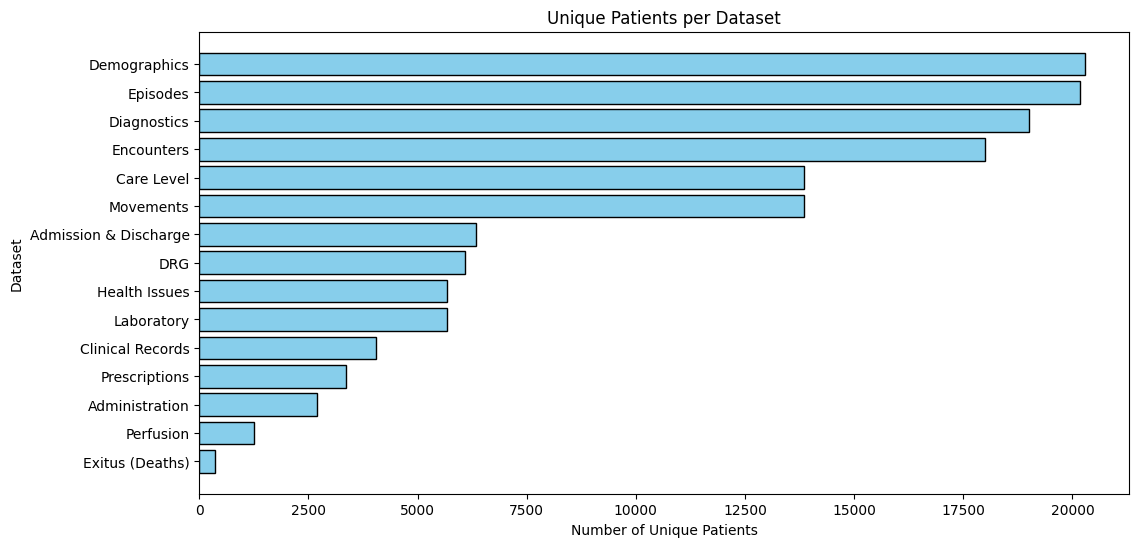

In [132]:
# Dictionary of datasets and their unique patient counts
unique_patients = {
    'Administration': administration_df['nhc'].nunique(),
    'Admission & Discharge': admission_discharge_df['nhc'].nunique(),
    'Care Level': care_level_df['nhc'].nunique(),
    'Clinical Records': clinical_records_df['nhc'].nunique(),
    'Demographics': demographic_df['nhc'].nunique(),
    'Diagnostics': diagnostic_df['nhc'].nunique(),
    'DRG': drg_df['nhc'].nunique(),
    'Encounters': encounter_df['nhc'].nunique(),
    'Episodes': episode_df['nhc'].nunique(),
    'Exitus (Deaths)': exitus_df['nhc'].nunique(),
    'Health Issues': health_issues_df['nhc'].nunique(),
    'Laboratory': laboratory_df['nhc'].nunique(),
    'Movements': movement_df['nhc'].nunique(),
    'Perfusion': perfusion_df['nhc'].nunique(),
    'Prescriptions': prescription_df['nhc'].nunique(),
}

# Sort datasets by number of unique patients in descending order
unique_patients = dict(
    sorted(unique_patients.items(), key=lambda x: x[1], reverse=True))

# Plot unique patient counts per dataset
plt.figure(figsize=(12, 6))
plt.barh(
    list(unique_patients.keys()),
    list(unique_patients.values()),
    color='skyblue',
    edgecolor='black')
plt.title('Unique Patients per Dataset')
plt.xlabel('Number of Unique Patients')
plt.ylabel('Dataset')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

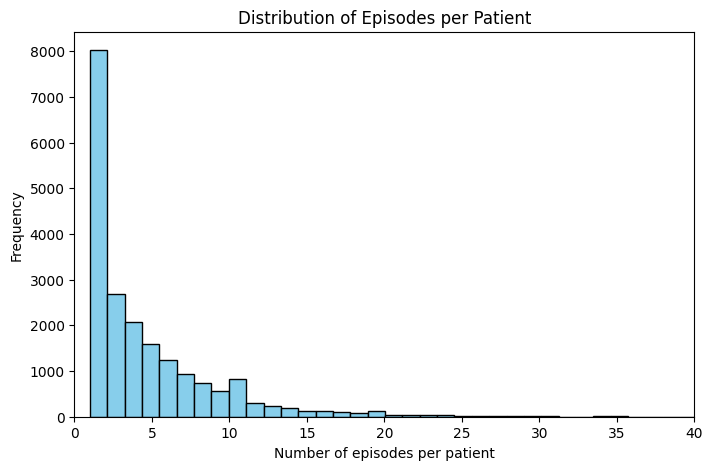

In [133]:
# Episode counts:
episode_counts = episode_df['nhc'].value_counts()

# Plot:
plt.figure(figsize = (8, 5))
plt.hist(episode_counts, bins = 100, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of Episodes per Patient')
plt.xlabel('Number of episodes per patient')
plt.ylabel('Frequency')
plt.xlim([0, 40])
plt.show()

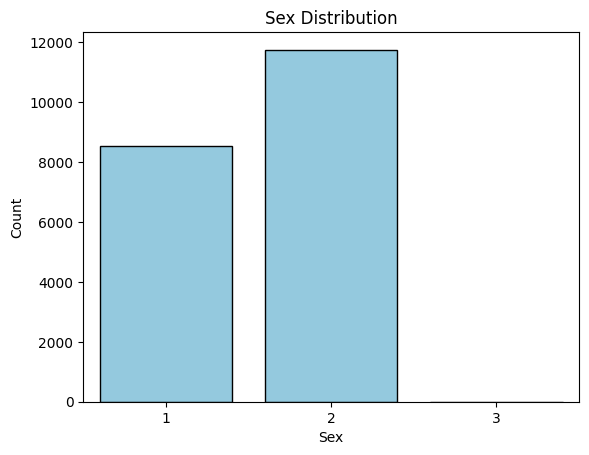

In [134]:
# Distribution of sex:
ax = sns.countplot(x = 'sex_atr', data = demographic_df, color = 'skyblue', edgecolor = 'black')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

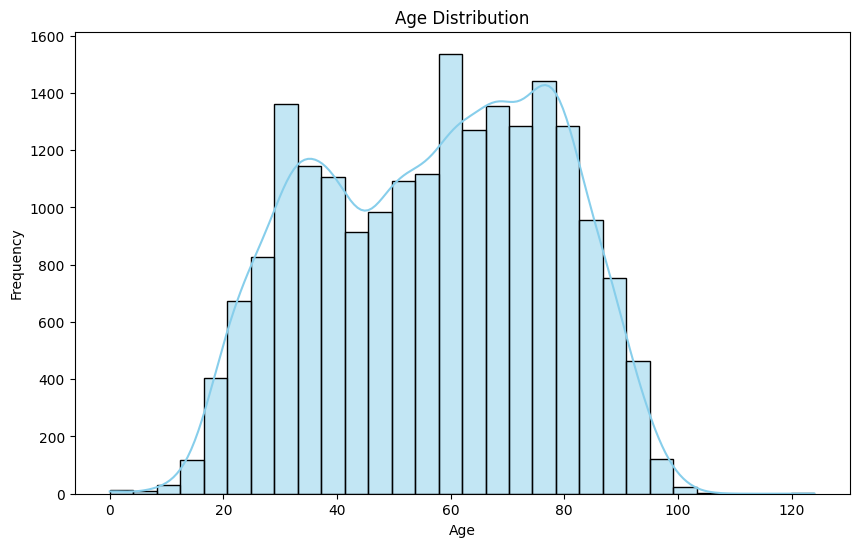

In [135]:
# Calculate the age:
ref_date = pd.to_datetime('2024-11-28')
demographic_df['age'] = (ref_date - demographic_df['birth_date']).dt.days // 365

# Plot:
plt.figure(figsize = (10, 6))
sns.histplot(demographic_df['age'], kde = True, bins = 30, color = 'skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

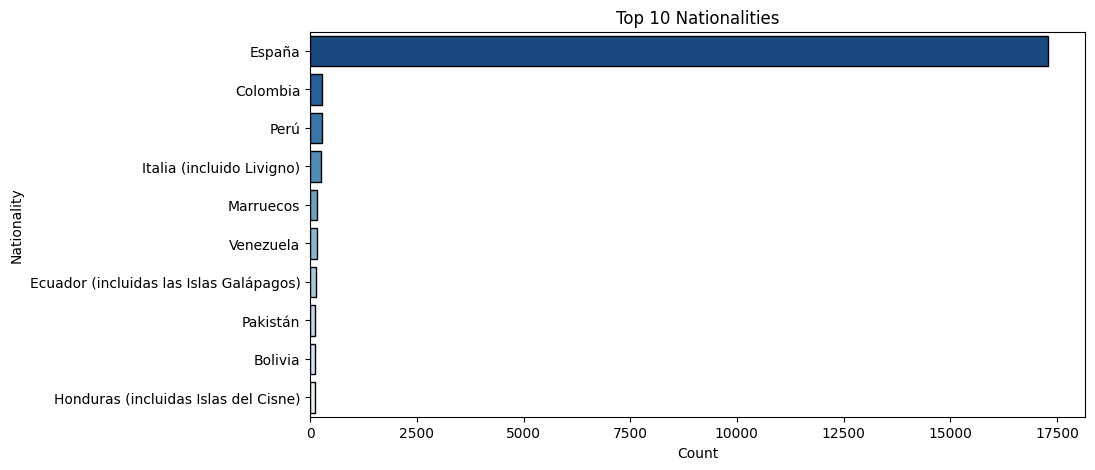

In [136]:
# Top 10 nationalities:
top_nationalities = demographic_df['nation_descr'].value_counts().head(10)

# Plot:
plt.figure(figsize = (10, 5))
sns.barplot(x = top_nationalities.values, y = top_nationalities.index, hue = top_nationalities.index, palette = 'Blues_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Nationalities')
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.show()

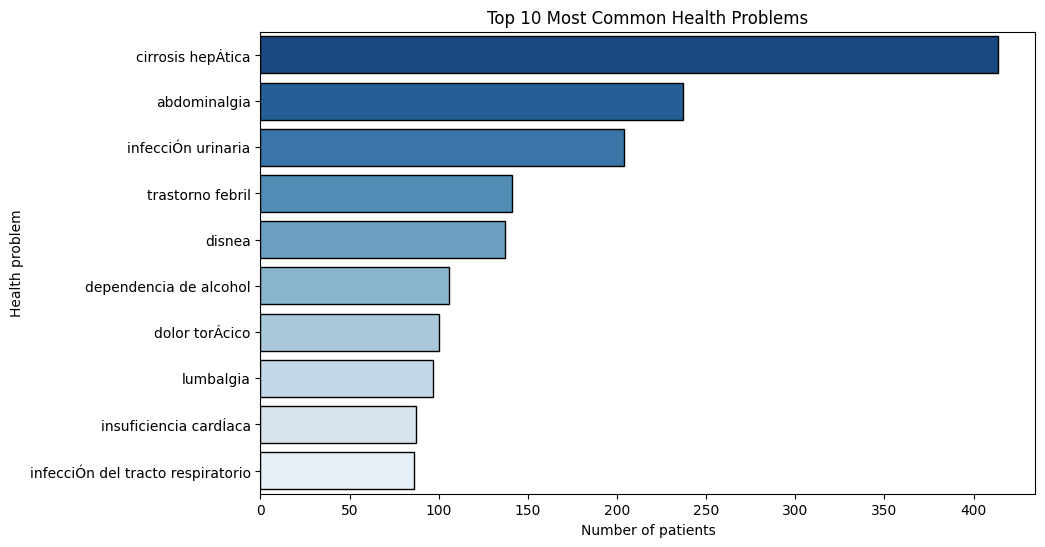

In [137]:
# Top 10 most common health issues:
top_health_issues = health_issues_df['snomed_descr'].value_counts().head(10)

# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_health_issues.values, y = top_health_issues.index, hue = top_health_issues.index, palette = 'Blues_r', edgecolor = 'black')
plt.title('Top 10 Most Common Health Problems')
plt.xlabel('Number of patients')
plt.ylabel('Health problem')
plt.show()

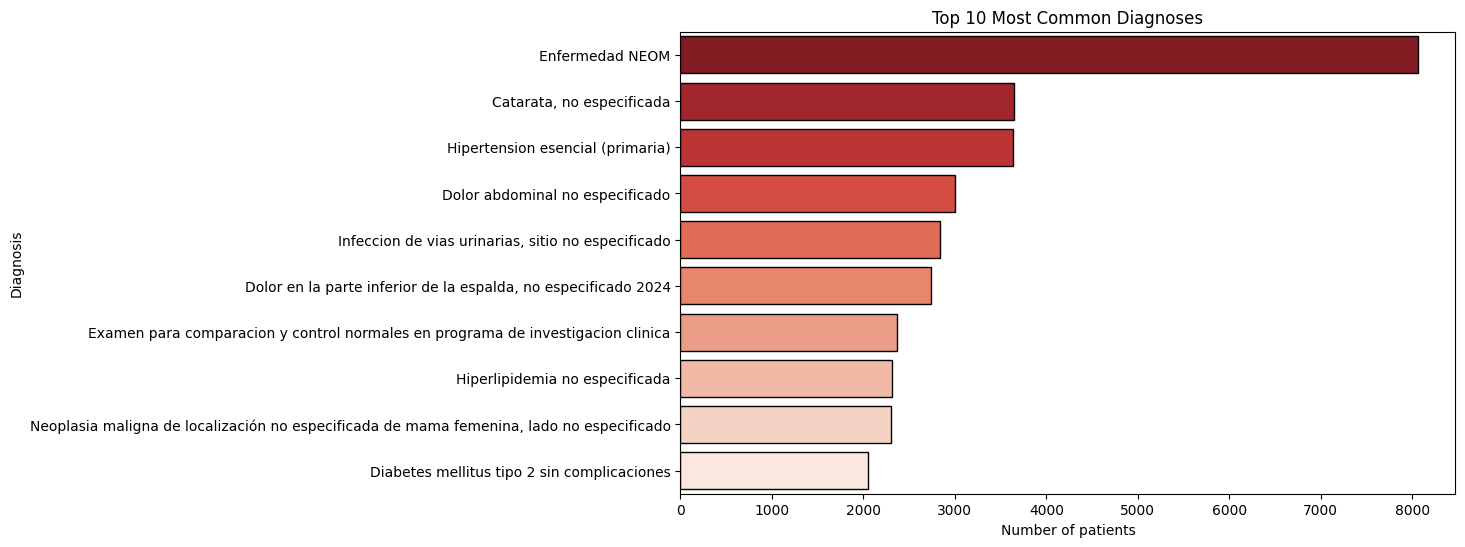

In [138]:
# Top 10 most common diagnoses:
top_diagnoses = diagnostic_df['icd10_descr'].value_counts().head(10)

# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_diagnoses.values, y = top_diagnoses.index, hue = top_health_issues.index, palette = 'Reds_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Most Common Diagnoses')
plt.xlabel('Number of patients')
plt.ylabel('Diagnosis')
plt.show()

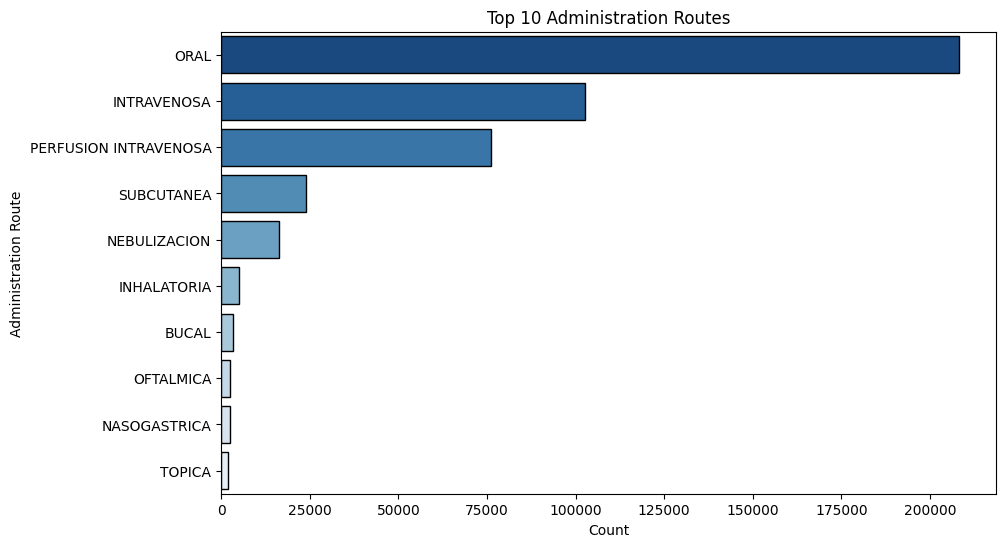

In [139]:
# Top 10 administration routes:
top_adm_routes = administration_df['adm_route_descr'].value_counts().head(10)

# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_adm_routes.values, y = top_adm_routes.index, hue = top_health_issues.index, palette = 'Blues_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Administration Routes')
plt.xlabel('Count')
plt.ylabel('Administration Route')
plt.show()

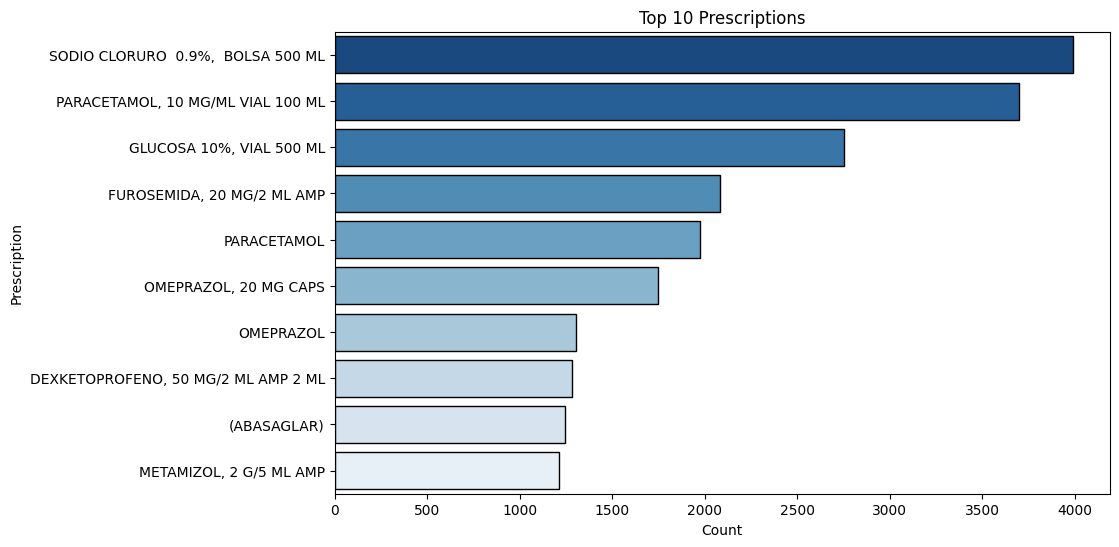

In [140]:
# Top 10 prescriptions:
filtered_prescription_df = prescription_df[~prescription_df['prescription_drug_descr'].str.contains('Unknown', case = False, na = False)]
top_prescriptions = filtered_prescription_df['prescription_drug_descr'].value_counts().head(10)


# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_prescriptions.values, y = top_prescriptions.index, hue = top_health_issues.index, palette = 'Blues_r', edgecolor = 'black', legend = False)
plt.title('Top 10 Prescriptions')
plt.xlabel('Count')
plt.ylabel('Prescription')
plt.show()

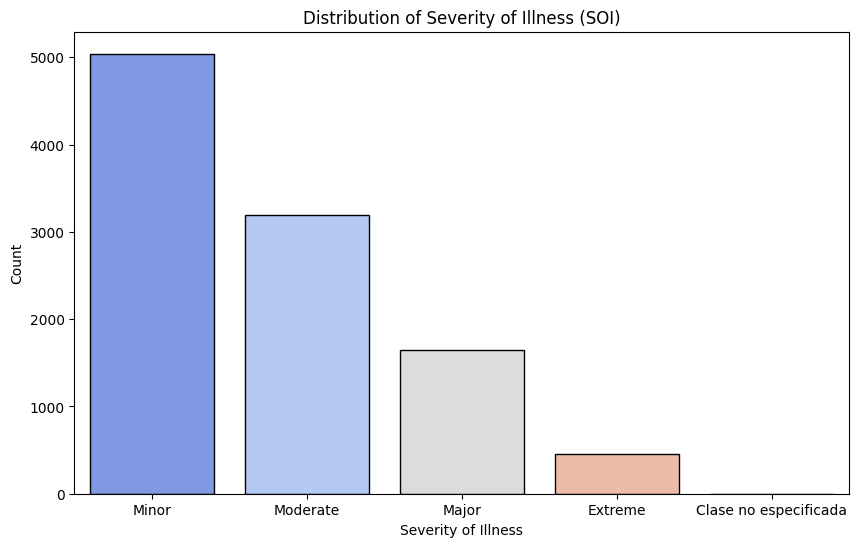

In [141]:
# SOI distribution:
soi_counts = drg_df['drg_soi_descr'].value_counts()

# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = soi_counts.index, y = soi_counts.values, hue = soi_counts.index, palette = 'coolwarm', edgecolor = 'black', legend = False)
plt.title('Distribution of Severity of Illness (SOI)')
plt.xlabel('Severity of Illness')
plt.ylabel('Count')
plt.show()

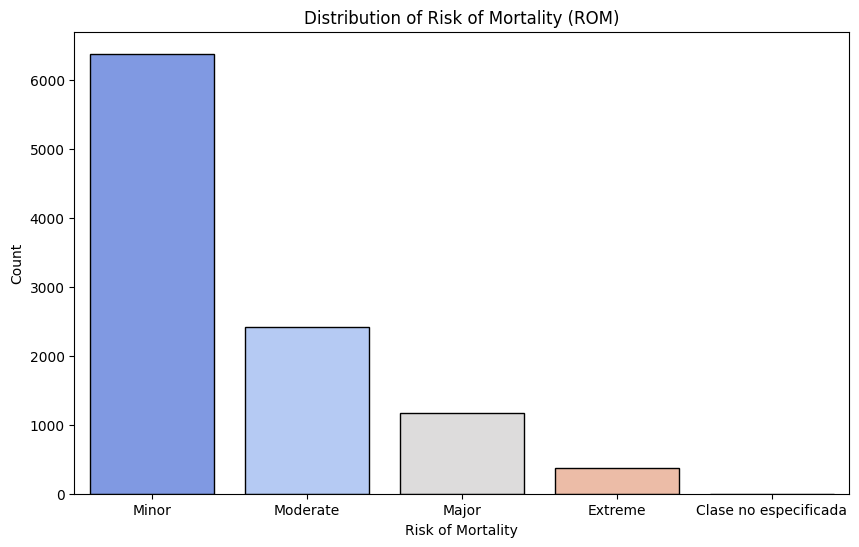

In [142]:
# ROM distribution:
rom_counts = drg_df['drg_rom_descr'].value_counts()

# Plot:
plt.figure(figsize = (10, 6))
sns.barplot(x = rom_counts.index, y = rom_counts.values, hue = rom_counts.index, palette = 'coolwarm', edgecolor = 'black', legend = False)
plt.title('Distribution of Risk of Mortality (ROM)')
plt.xlabel('Risk of Mortality')
plt.ylabel('Count')
plt.show()

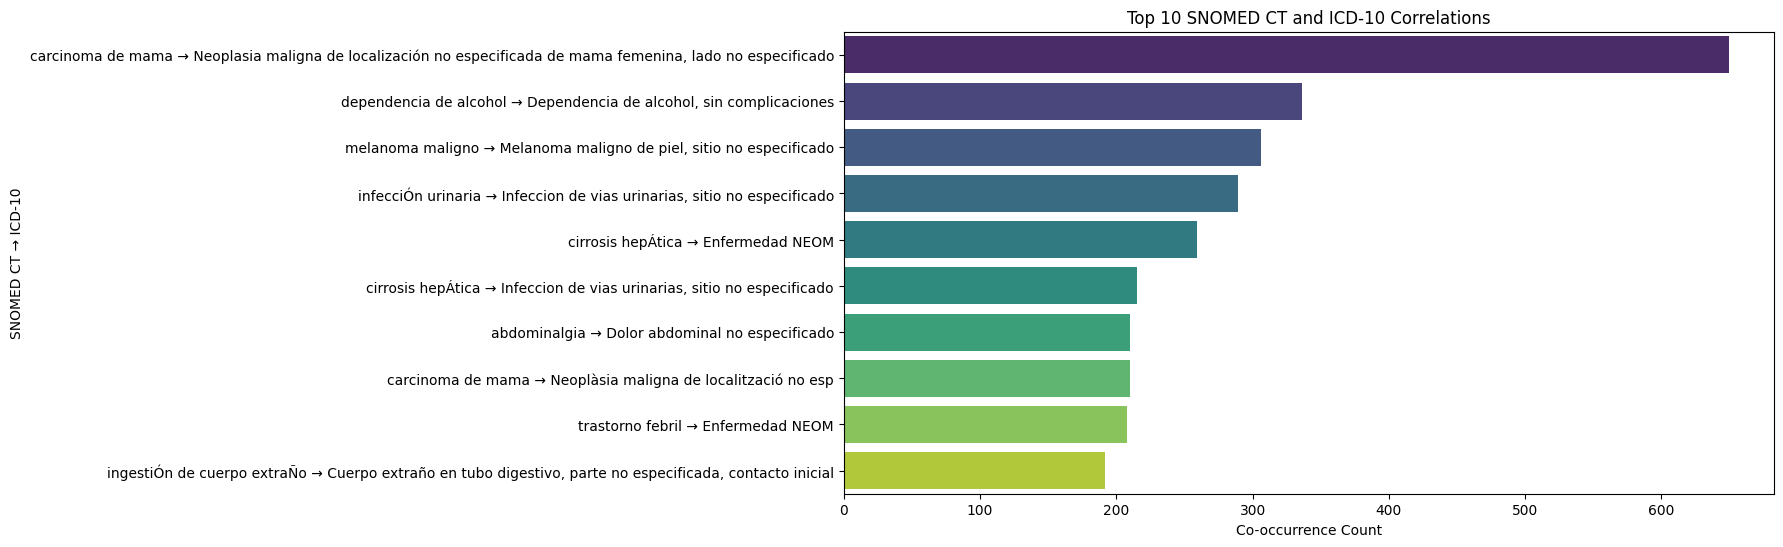

In [143]:
# Merge health issues with episodes to get episode_ref:
health_issues_with_episodes = health_issues_df.merge(episode_df[['nhc', 'episode_ref']], on = 'nhc', how = 'left')

# Merge with diagnostic_df to get diagnoses:
merged_df = health_issues_with_episodes.merge(diagnostic_df, on = ['nhc', 'episode_ref'], suffixes = ('_snomed', '_icd'))

# Count co-occurrences of SNOMED CT and ICD-10:
correlation_counts = merged_df.groupby(['snomed_descr', 'icd10_descr']).size().reset_index(name = 'count')

# Top 10 most frequent correlations:
top_correlations = correlation_counts.sort_values('count', ascending = False).head(10)

# Plot:
plt.figure(figsize = (12, 6))
sns.barplot(x = top_correlations['count'], y = top_correlations['snomed_descr'] + ' → ' + top_correlations['icd10_descr'], hue = top_correlations['snomed_descr'] + ' → ' + top_correlations['icd10_descr'], palette = 'viridis', legend = False)
plt.title('Top 10 SNOMED CT and ICD-10 Correlations')
plt.xlabel('Co-occurrence Count')
plt.ylabel('SNOMED CT → ICD-10')
plt.show()